<a href="https://colab.research.google.com/github/fgonzalezre/Nltk/blob/main/NLTK_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ecuacion de busqueda: *"sustainable energy" AND ("artificial intelligence" OR "machine learning")*

Filtro: Tittle only

# Install Libraries and call data

In [ ]:
#collapse-hide
# Import libraries and load the data

import numpy as np
import pandas as pd
import re

!pip install -U scikit-learn

from time import time

import matplotlib.pyplot as plt


import nltk
import spacy
import string
nltk.download('punkt')
nltk.download("book")
nltk.download('all')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
!pip install contractions
!pip install unidecode
!pip install num2words
!pip install SpellChecker
!pip install demoji
import demoji
import contractions
import unidecode
from num2words import num2words
pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.max_colwidth=None


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /roo

https://colab.research.google.com/github/sagar118/blog/blob/master/_notebooks/2021-04-11-Text-Preprocessing.ipynb?authuser=2#scrollTo=Ykk_PuBSGalD

[texto del enlace](https://colab.research.google.com/github/sagar118/blog/blob/master/_notebooks/2021-04-11-Text-Preprocessing.ipynb?authuser=2#scrollTo=Ykk_PuBSGalD)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#       lectura del CSV
path = "/content/drive/MyDrive/Ejercicio/scopus.csv"
# "/content/drive/MyDrive/Ejercicio/scopus.csv" es la ruta dentro del drive de https://drive.google.com/file/d/1XVgq0tuW5GmIq0sTybvg2EcXsstC0IWw/view?usp=sharing
df = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# shape of the DataSet


In [ ]:
for abstract in df['Abstract']:
    print(len(abstract))
print("")

1240
1741
786
347
1346
1717
2174
1556
1051
1489
1346
2237
1069
1544
1739
23
1410
1497
700
1441
1883



In [ ]:
#df.head()
#df['Abstract']
#df.shape

print(f'Shape of the whole data is: {df.shape[0]} rows and {df.shape[1]} columns')

print("\n",df.columns)

print("\nChacters per row in the Abstract column")
# how many tokens are in each row
df['Abstract_len'] = df['Abstract'].apply(lambda x: len(nltk.word_tokenize(x)))

for abstract in df['Abstract']:
    print(len(abstract))

print(" \nTokens or Strings per row in the Abstract column")
# print number of tokens per row
df['Abstract_len']

Shape of the whole data is: 21 rows and 23 columns

 Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

Chacters per row in the Abstract column
1240
1741
786
347
1346
1717
2174
1556
1051
1489
1346
2237
1069
1544
1739
23
1410
1497
700
1441
1883
 
Tokens or Strings per row in the Abstract column


0     198
1     266
2     137
3      77
4     204
5     298
6     347
7     257
8     181
9     233
10    218
11    386
12    172
13    227
14    273
15      5
16    249
17    228
18    118
19    232
20    271
Name: Abstract_len, dtype: int64

# Cleaning and removing

URL, Emails, Dates, HTML tags, Emojis, Emoticons, Hashtags and Mentions, Punctuations, Stopwords, Numbers, Extra whitespaces, Frequent words,Rare words

**Lowercasing**

*str.lower*
convert the values in the ‘Column’column of a pandas dataframe to lowercase.

In [ ]:
#df.text = df.text.str.lower()
df['Abstract'] = df['Abstract'].str.lower()

#df['Abstract']
#check results

**Remove URL**

The code you provided is written in Python and is used to *replace URLs* in the ‘text’ column of a pandas dataframe with an empty string. The first line of the code uses the str.replace() method from pandas to replace any URLs or web addresses starting with ‘http://’ or ‘https://’ with an empty string.

In [ ]:
df['text'] = df['Abstract'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)
#removes URLs from data
#df['Abstract']
#check results

**Remove Email**

The email address xyz@abc.co.in has been removed from the original text.

If you want to apply this code to a pandas DataFrame column named df['Abstract'], you can use the str.replace() method instead:

In [ ]:
#opcion 1 Usando Replace
df['Abstract'] = df['Abstract'].str.replace(r'\S+@\S+', '', regex=True)

#opcion2 Usando re.sub() function from the re
#import re
#text = 'I have being trying to contact xyz via email to xyz@abc.co.in but there is no response.'
#result = re.sub(r'\S+@\S+', '', text)

#removes E-mails from data
#df['Abstract']
#check results

**Remove or clean dates**


The code you provided is written in Python and is used to remove dates from a given text. The first part of the code removes date formats like dd/mm/yy(yy), dd-mm-yy(yy), dd(st|nd|rd).mm/yy(yy) using the re.sub() function from the re module. The second part of the code removes date formats like 20 apr 21, April 15th, 11th of April, 2021 using the re.compile() function from the re module.

If you want to apply this code to a pandas DataFrame column named df['Abstract'], you can use the str.replace() method instead:

In [ ]:
df['Abstract'] = df['Abstract'].str.replace(r'\d{1,2}(st|nd|rd|th)?[-./]\d{1,2}[-./]\d{2,4}', '', regex=True)
df['Abstract'] = df['Abstract'].str.replace(r'(\d{1,2})?(st|nd|rd|th)?[-./,]?\s?(of)?\s?([J|j]an(uary)?|[F|f]eb(ruary)?|[Mm]ar(ch)?|[Aa]pr(il)?|[Mm]ay|[Jj]un(e)?|[Jj]ul(y)?|[Aa]ug(ust)?|[Ss]ep(tember)?|[Oo]ct(ober)?|[Nn]ov(ember)?|[Dd]ec(ember)?)\s?(\d{1,2})?(st|nd|rd|th)?\s?[-./,]?\s?(\d{2,4})?', '', regex=True)
#removes dates from data

#df['Abstract']
#check results

**Remove HTML tags**

remove *HTML tags* from a given text. The first part of the code uses regular expressions to remove all HTML tags from the text. The second part of the code uses the Beautiful Soup library to extract the text from the HTML.

If you want to apply this code to a pandas DataFrame column named df['Abstract'], you can use the str.replace()

In [ ]:
#Opcion 1 reemplazará todas las etiquetas HTML en cada valor de la columna ‘Abstract’ con una cadena vacía. El argumento regex=True le indica a pandas que interprete el patrón <.*?> como una expresión regular.
df['Abstract'] = df['Abstract'].str.replace('<.*?>', '', regex=True)

#Opcion 2 pattern.sub('', text) y df['Abstract'] = df['Abstract'].str.replace('<.*?>', '', regex=True) es cómo se aplica la eliminación de las etiquetas HTML.
#Cuando usas pattern.sub('', text), estás aplicando la función sub del módulo re de Python para reemplazar todas las etiquetas HTML en el texto con una cadena vacía.

#df['Abstract']
#check results

**Remove Emoji**

 The *remove_emoji* function uses a regular expression pattern to match and remove various ranges of Unicode characters that represent emojis: 😀

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Abstract'] = df['Abstract'].apply(remove_emoji)

#remove or clean Emojis

#df['Abstract']
#check results

**Remove Emoticons**

remove emoticons from a pandas DataFrame column using the function def remove_emoticons(text), *EMOTICONS* variable should be defined before using the remove_emoticons function. You can define it as a list of emoticons you want to remove. :)

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

import re
import pandas as pd

def remove_emoticons(text):
    emoticons_pattern = re.compile(u'(' + u'|'.join(emo for emo in EMOTICONS) + u')')
    return emoticons_pattern.sub(r'', text)

# Remove emoticons from text
df['Abstract'] = df['Abstract'].apply(lambda x: remove_emoticons(x))

#df['Abstract']
#check results

**Remove Hashtags and Mentions**

defines a function named *remove_tags_mentions* that takes a text parameter. This function removes hashtags and mentions from the given text using regular expressions. Inside the function, a regular expression pattern is defined using the re.compile function. The pattern matches any substring that starts with an @ symbol (@\S+) or a # symbol (#\S+). The \S+ part matches one or more non-whitespace characters after the symbol.
The pattern.sub('', text) line uses the compiled pattern to substitute all matches with an empty string, effectively removing them from the input text.

In [ ]:
def remove_tags_mentions(text):
    pattern = re.compile(r'(@\S+|#\S+)')
    return pattern.sub('', text)

# Remove hashtags and mentions from the 'Abstract' column
df['Abstract'] = df['Abstract'].apply(lambda x: remove_tags_mentions(x))

#df['Abstract']
#check results

**Remove Punctuation**

removes punctuation from a given text using the function remove_punctuation that takes a text parameter. This function removes all punctuation marks from the given text using the translate method of strings. The *PUNCTUATIONS* variable is defined as a string of all ASCII punctuation characters.
The remove_punctuation function is defined. It takes a text parameter, which represents the input text from which punctuation marks will be removed.
Inside the function, an empty translation table is created using the str.maketrans method. This table maps each punctuation character to None, effectively removing them from the input text.
The text.translate(str.maketrans('', '', PUNCTUATIONS)) line uses the translation table to remove all punctuation marks from the input text.

In [ ]:
#puntuations = !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#print(PUNCTUATIONS)

PUNCTUATIONS = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCTUATIONS))
# Remove punctuation from the 'Abstract' column
df['Abstract'] = df['Abstract'].apply(lambda x: remove_punctuation(x))

#df['Abstract']
#check results

**Remove Stopwords**

This code imports the nltk library and the stopwords module from the nltk.corpus package. It then downloads the* stopwords for English* using nltk.download('stopwords'). Finally, it prints the list of stopwords by calling stopwords.words('english').

In [ ]:
print(stopwords.words('english'))
#verify what's being taken out

def remove_stopwords(text):
    pattern = re.compile(r'(@\S+|#\S+)')
    return pattern.sub('', text)

# Remove stopwords from the 'Abstract' column
df['Abstract'] = df['Abstract'].apply(lambda x: remove_stopwords(x))

#df['Abstract']
#check results

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Remove Numbers**

uses the str.replace method to replace all occurrences of numbers in the Abstract column with an empty string. The regular expression r'\d+' matches one or more digits, and the regex=True argument enables the use of regular expressions in the replacement.

In [ ]:
df['Abstract'] = df['Abstract'].str.replace(r'\d+', '', regex=True)
#removes numbers

#df['Abstract']
#check results

**Remove all characters that are not letters, digits, or underscores**

*(r'\W+', '', regex=True)*

This replaces all *non-word characters* (i.e., characters that are not letters, digits, or underscores) with an empty string. The regular expression \W+ matches one or more non-word characters.

*cleaned_string = re.sub(r"[^\w\s]", "", string) *

uses the re.sub() method from the Python re module to substitute special characters with an empty string. The regular expression pattern [***^\w\s] matches any character that is not a word character (\w) or a whitespace character (\s).*** By replacing these characters with an empty string, the function effectively removes them from the input string.

You can apply this function to the 'Abstract' column of your DataFrame using the .apply() method. The modified DataFrame will have the special characters removed from the 'Abstract' column.

In [ ]:
#df['Abstract'] = df['Abstract'].str.replace(r'\W+', '', regex=True).astype('str')
#Removes all "non-letter" characters with spaces

#df['Abstract']
#check results

import re

def remove_special_characters(string):
    # Remove special characters except spaces
    cleaned_string = re.sub(r"[^\w\s]", "", string)
    return cleaned_string

df['Abstract'] = df['Abstract'].apply(remove_special_characters)
#Removes all "non-letter" characters without spaces

ascii_list = [chr(i) for i in range(128, 256)]
print("Especial characters")
print(ascii_list)


#df['Abstract']
#check results

Especial characters
['\x80', '\x81', '\x82', '\x83', '\x84', '\x85', '\x86', '\x87', '\x88', '\x89', '\x8a', '\x8b', '\x8c', '\x8d', '\x8e', '\x8f', '\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99', '\x9a', '\x9b', '\x9c', '\x9d', '\x9e', '\x9f', '\xa0', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '\xad', '®', '¯', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ']


**Remove Extra whitespaces**

function named remove_whitespaces that takes a string text as input. This function *removes any leading or trailing whitespace *characters from the input string and replaces consecutive whitespace characters with a single space.

The split() method is called on the input string text. This splits the string into a list of substrings at each occurrence of whitespace characters (spaces, tabs, etc.).

The join() method is then called on the resulting list of substrings. This concatenates the substrings using a space character as the separator, effectively ***replacing consecutive whitespace characters with a single space***.

The modified string is returned as the output of the function.

In [ ]:
def remove_whitespaces(text):
    return " ".join(text.split())

df['Abstract'] = df['Abstract'].apply(lambda x: remove_whitespaces(x))

#df['Abstract']
#check results

**Frequent words**

 function that finds the most frequent words in a given text and removes them from the text using the nltk library and the Counter class

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

def freq_words(text):
    tokens = word_tokenize(text)
    counter = Counter()

    for word in tokens:
        counter[word] += 1

    frequent_words = []
    for (word, word_count) in counter.most_common(10):
        frequent_words.append(word)

    return frequent_words

def remove_fw(text, frequent_words):
    tokens = word_tokenize(text)
    without_fw = []

    for word in tokens:
        if word not in frequent_words:
            without_fw.append(word)

    without_fw = ' '.join(without_fw)
    return without_fw

#for abstract in df['Abstract']:
   # frequent_words = freq_words(abstract)
   # text_without_fw = remove_fw(abstract, frequent_words)

    #print("Frequent words:", frequent_words)
   # print(text_without_fw)

Remove Rare words

Rare words are similar to frequent words. We can remove them because they are so less that they cannot add any value to the purpose

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

def rare_words(text):
    tokens = word_tokenize(text)
    counter = Counter()

    for word in tokens:
        counter[word] += 1

    rare_words_list = []
    for (word, word_count) in counter.most_common()[-10:]:
        rare_words_list.append(word)

    return rare_words_list

def remove_rw(text, rare_words):
    tokens = word_tokenize(text)
    without_rw = []

    for word in tokens:
        if word not in rare_words:
            without_rw.append(word)

    without_rw = ' '.join(without_rw)
    return without_rw

#for abstract in df['Abstract']:
   # rare_words_list = rare_words(abstract)
  #  text_without_rw = remove_rw(abstract, rare_words_list)

    #print("Rare words:", rare_words_list)
   # print(text_without_rw)



# NLTK

Tokenize, pos_tag, steam

The **nltk.word_tokenize()** function is used to tokenize each sentence in the row into a list of words.

The **nltk.pos_tag()** function is used to tag each word in the list with its corresponding part of speech (POS).

defines a function called **stem() **that takes a word as input and returns its stem. The stem of a word is the part of the word that remains after removing any affixes, such as prefixes or suffixes. For example, the stem of the word “running” is “run”, and the stem of the word “cats” is “cat”.

The **stem() **function uses a list of common suffixes to identify and remove affixes from words. If a word ends with one of the suffixes in the list, the function removes the suffix and returns the remaining part of the word as its stem. If the word does not end with any of the suffixes, the function returns the original word.

The code then tokenizes and tags each row in the *Stemmed *column of a DataFrame called df. It first converts each row to a string using **join()**, then tokenizes the string using **nltk.word_tokenize()**, and finally tags each token using **nltk.pos_tag()**. The tagged tokens are then printed for each row.

**Steam**

This will create a new column called Stemmed in your DataFrame, where each row contains a list of stemmed words from the corresponding row in the Abstract column. The apply method applies the lambda function to each row of the DataFrame, and the lambda function splits each row into words and applies the stem function to each word.

**CC**: It is the conjunction of coordinating
**CD**: It is a digit of cardinal
**DT**: It is the determiner
**EX**: Existential
**FW**: It is a foreign word
**IN**: Preposition and conjunction
**JJ**: Adjective
**JJR and JJS**: Adjective and superlative
**LS**: List marker
**MD**: Modal
**NN**: Singular noun
**NNS, NNP, NNPS**: Proper and plural noun
**PDT**: Predeterminer
**WRB**: Adverb of wh
**WP$**: Possessive wh
**WP**: Pronoun of wh
**WDT**: Determiner of wp
**VBZ**: Verb
**VBP, VBN, VBG, VBD, VB**: Forms of verbs
**UH**: Interjection
**TO**: To go
**RP**: Particle
**RBS, RB, RBR**: Adverb
**PRP, PRP**: Pronoun personal and professional

**tokenize** each abstract, then apply both the **lemmatization** and **stemming** functions to each token, and finally tag each stemmed token. It will print both the lemmatized tokens and the stemmed and tagged tokens for each abstract. Please ensure that you have the necessary libraries (nltk in this case) installed and imported, and that the DataFrame df and its ‘Abstract’ column exist. If you encounter any issues, feel free to ask! I’m here to help.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Define the stem function
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Loop through each row in df['Abstract']
for abstract in df['Abstract']:
    # Tokenize the row using nltk.word_tokenize
    tokens = word_tokenize(abstract)

    # Apply the lemmatizer to each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Apply the stem function to each lemmatized token
    stemmed_tokens = [stem(token) for token in lemmatized_tokens]

    # Tag the stemmed tokens using nltk.pos_tag
    tagged = nltk.pos_tag(stemmed_tokens)

    # Print the lemmatized, stemmed, and tagged tokens for each row
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Stemmed and Tagged Tokens:", tagged)


Lemmatized Tokens: ['clean', 'energy', 'and', 'the', 'environment', 'are', 'considered', 'a', 'the', 'most', 'influential', 'parameter', 'to', 'promote', 'sustainable', 'development', 'however', 'with', 'the', 'increase', 'in', 'the', 'global', 'population', 'the', 'consumption', 'of', 'energy', 'source', 'from', 'the', 'nonrenewable', 'category', 'is', 'increasing', 'rapidly', 'on', 'the', 'other', 'hand', 'with', 'the', 'utilization', 'of', 'nonrenewable', 'energy', 'source', 'like', 'petrodiesels', 'environmental', 'air', 'pollution', 'is', 'also', 'increasing', 'to', 'combat', 'the', 'energy', 'and', 'environmental', 'crisis', 'clean', 'and', 'renewable', 'fuel', 'like', 'biofuels', 'are', 'popular', 'a', 'a', 'petrodiesel', 'replacement', 'fuel', 'biofuels', 'can', 'be', 'obtained', 'from', 'different', 'feedstock', 'and', 'they', 'are', 'successfully', 'tested', 'in', 'diesel', 'engine', 'however', 'during', 'their', 'production', 'and', 'engine', 'testing', 'several', 'parameter

**cleaned_words** Creates a "*clean list*" for reading only Nouns, adjetives and verbs

In [ ]:
# Initialize an empty list to store the text objects
from nltk.text import Text

texts = []

# Loop through each row in df['Abstract']
for row in df['Abstract']:
    # Convert the row to a string
    row = str(row)
    # Tokenize the row using nltk.word_tokenize
    tokens = nltk.word_tokenize(row)
    # Create a text object from the tokens using the Text class
    text = Text(tokens)
    # Append the text object to the texts list
    texts.append(text)


# Create a set to store the tags that you want to keep
keep_tags = {'NN', 'JJ', 'VB'}
# Create a set to store the tags that you want to exclude
exclude_tags = {'CC', 'TO', 'VBP'}

# Loop through each text object in the texts list
for text in texts:
    # Initialize an empty list to store the cleaned words
    cleaned_words = []

    # Loop through each word in the text
    for word in text:
        # Get the part-of-speech tag of the word using pos_tag function
        tag = nltk.pos_tag([word])[0][1]
        # Check if the tag is in the keep_tags set and not in exclude_tags set
        if tag in keep_tags and tag not in exclude_tags:
            # Append the word to the cleaned_words list
            cleaned_words.append(word)

    # Print the cleaned words for each text
    print(cleaned_words)

['clean', 'energy', 'environment', 'influential', 'promote', 'sustainable', 'development', 'increase', 'global', 'population', 'consumption', 'energy', 'nonrenewable', 'category', 'other', 'hand', 'utilization', 'nonrenewable', 'energy', 'environmental', 'air', 'pollution', 'combat', 'energy', 'environmental', 'clean', 'renewable', 'popular', 'petrodiesel', 'replacement', 'be', 'different', 'diesel', 'production', 'engine', 'several', 'influence', 'output', 'accurate', 'prediction', 'end', 'challenge', 'traditional', 'artificial', 'intelligence', 'ai', 'successful', 'nonlinear', 'achieve', 'high', 'success', 'rate', 'prediction', 'chapter', 'different', 'ai', 'feasible', 'solution', 'complex', 'biodiesel', 'production', 'engine', 'detail', 'scrivener', 'publishing', 'llc']
['text', 'sustainable', 'energy', 'st', 'such', 'artificial', 'intelligence', 'blockchain', 'technology', 'internet', 'several', 'case', 'internet', 'artificial', 'intelligence', 'blockchain', 'technology', 'field', 

**Frecuent words within df['Stemmed']**

identifies the 10 most common stemmed words in the text, filtering nouns, adjetives and verbs

In [ ]:
# Loop through each text object in the texts list
for text in texts:
    # Get the 10 most frequent words in the text using FreqDist and most_common methods
    frequent_words = nltk.FreqDist(text).most_common(20)
    # Initialize an empty list to store the cleaned words
    cleaned_words = []

    # Loop through each word and its frequency in the frequent_words list
    for word, freq in frequent_words:
        # Get the part-of-speech tag of the word using pos_tag function
        tag = nltk.pos_tag([word])[0][1]
        # Check if the tag is in the keep_tags set and not in exclude_tags set
        if tag in keep_tags and tag not in exclude_tags:
            # Append the word to the cleaned_words list
            cleaned_words.append(word)

    # Print the cleaned words for each text
    print(cleaned_words)

['energy', 'clean', 'nonrenewable']
['energy', 'sustainable', 'artificial', 'intelligence', 'text', 'blockchain', 'internet', 'engineering', 'st', 'such', 'technology']
['energy', 'human', 'share', 'same', 'community', 'usage', 'fossil']
['title', 'paper', 'corrigendum', 'report', 'typo', 'third', 'column']
['evs', 'ev', 'energy', 'household', 'high', 'model', 'potential']
['energy', 'solar', 'wind', 'renewable', 'power', 'algorithms', 'etc', 'ai', 'generation', 'supply', 'ml']
['energy', 'production', 'fossil', 'biomass', 'waste']
['ml', 'energy', 'algorithms', 'other', 'management', 'artificial']
['energy', 'ml', 'research', 'renewable', 'storage', 'conversion', 'management']
['machine', 'sustainable', 'research', 'rapid', 'development', 'artificial', 'intelligence', 'application', 'engineering']
['energy', 'ml', 'such', 'algorithms', 'power', 'control', 'sector', 'management', 'demand']
['ai', 'energy', 'new', 'power', 'industry', 'supply', 'technology', 'study', 'use']
['st', 'be',

In [ ]:
import nltk
from collections import Counter

# Define the stem function
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Tokenize, stem, and tag each row in the Abstract column
texts = []
for abstract in df['Abstract']:
    # Tokenize the row using nltk.word_tokenize
    tokens = nltk.word_tokenize(abstract)

    # Apply the stem function to each token
    stemmed_tokens = [stem(token) for token in tokens]

    # Tag the stemmed tokens using nltk.pos_tag
    tagged = nltk.pos_tag(stemmed_tokens)

    # Filter the words based on their tags
    cleaned_words = [word for word, tag in tagged if tag in keep_tags and tag not in exclude_tags]

    # Append the cleaned words to the texts list
    texts.extend(cleaned_words)

# Count the frequency of each word
word_counts = Counter(texts)

print("25 Most common words and how many times it has appeared")
# Print the word counts
for word, count in word_counts.most_common(25):
    print(f'{word}: {count}')


25 Most common words and how many times it has appeared
energy: 108
sustainable: 39
thi: 34
system: 32
i: 26
learn: 26
artificial: 25
machine: 25
manage: 23
intelligence: 22
renewable: 20
research: 20
ai: 19
ml: 19
application: 18
grid: 18
algorithm: 18
develop: 17
model: 17
techniqu: 16
power: 16
st: 15
be: 14
production: 14
sourc: 13


**Tree structure is stored in the entities variable**


nltk.chunk.ne_chunk() is a function from the nltk library that is used to perform named entity recognition (NER) on a sequence of tagged tokens. It takes a list of tagged tokens as input and returns a tree structure where named entities are labeled with their corresponding entity type.

In your code, you are using nltk.chunk.ne_chunk() to perform NER on the tagged list of tokens. The resulting tree structure is stored in the entities variable, which you then print to the console using print(entities).

This will print out the named entities in the text along with their corresponding entity type. The output will be in the form of a tree structure, where each node represents a chunk of text and its corresponding entity type.

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)

#print(entities)

**Graphic shows how frequently each word appears in the text**


imports the Text class from the **nltk.text** module and initializes an empty list called texts. It then loops through each row in the df['Abstract'] column, converts each row to a string, tokenizes the row using **nltk.word_tokenize**, creates a text object from the tokens using the Text class, and appends the text object to the texts list.

The code then accesses the content in the variable *frequent_words* and loops through each text object in the texts list. For each text object, it uses the **dispersion_plot** method on the text object, passing the *frequent_words* as an argument. The **dispersion_plot** method creates a plot that shows how frequently each word in *frequent_words* appears in the text object, with each vertical line representing an instance of a word in the text and each horizontal axis representing the position of that instance in the text.

['energy', 'quantum', 'sustainable', 'renewable', 'various', 'qc', 'potential']


/usr/local/lib/python3.10/dist-packages/nltk/draw/dispersion.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots()


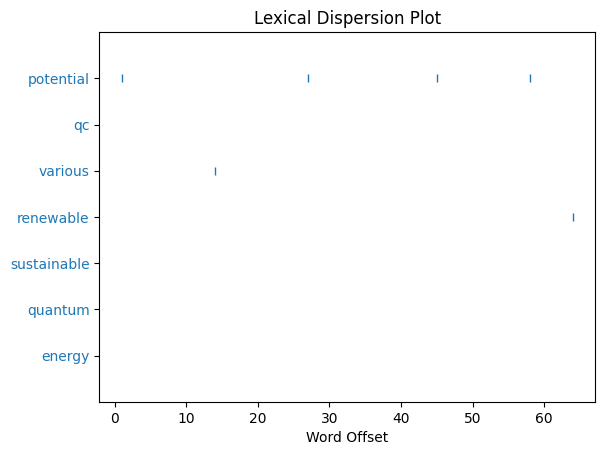

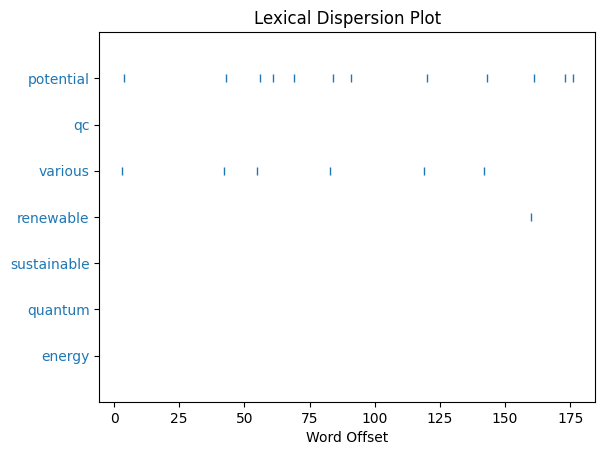

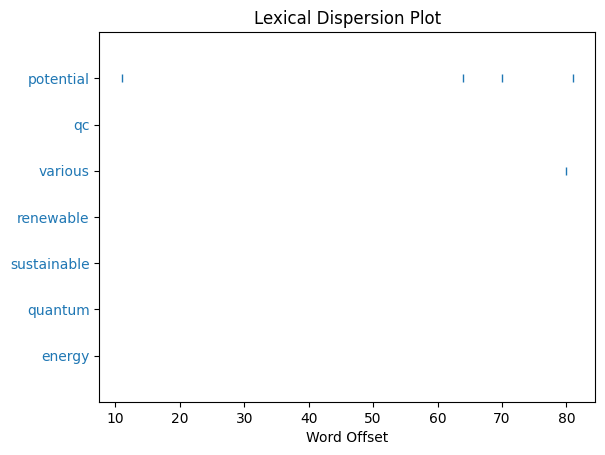

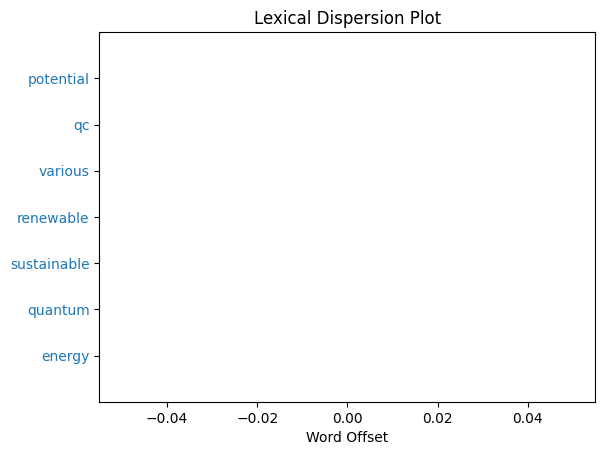

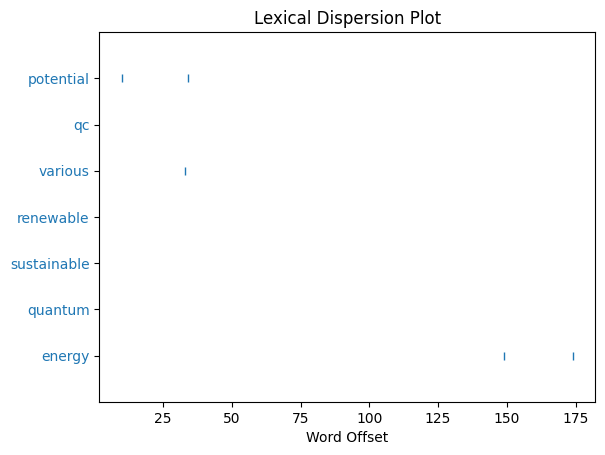

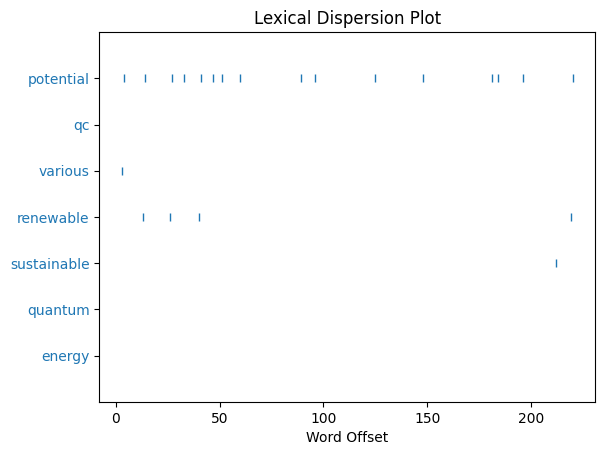

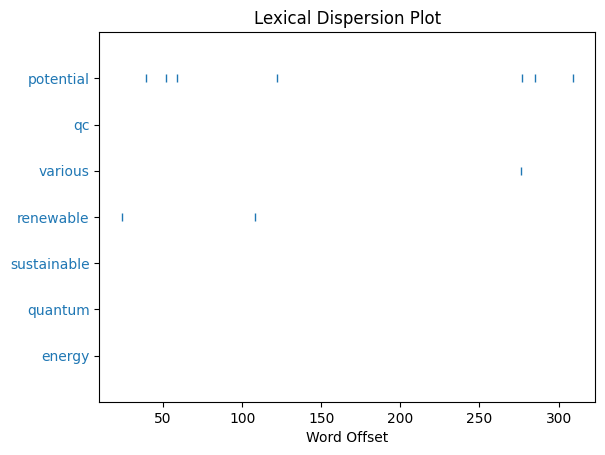

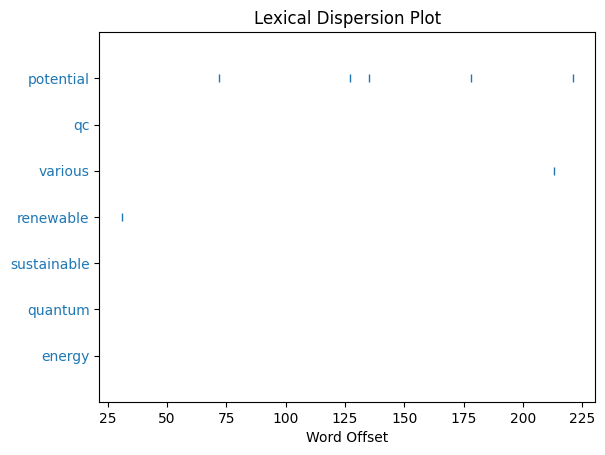

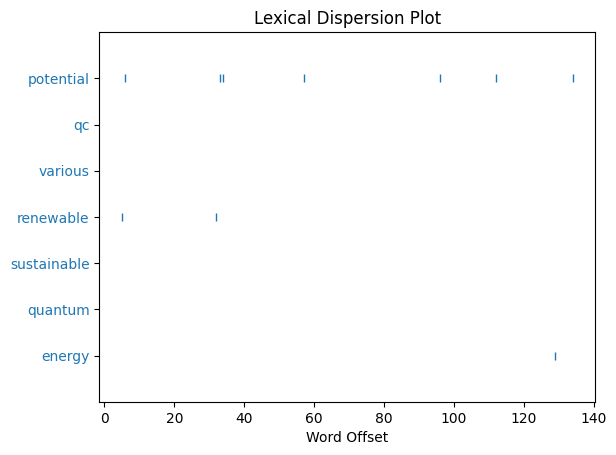

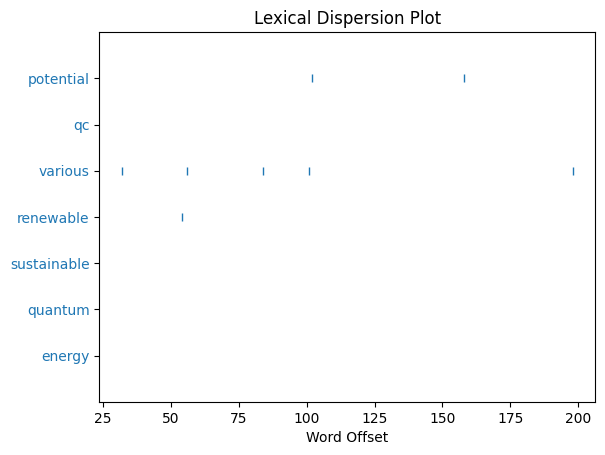

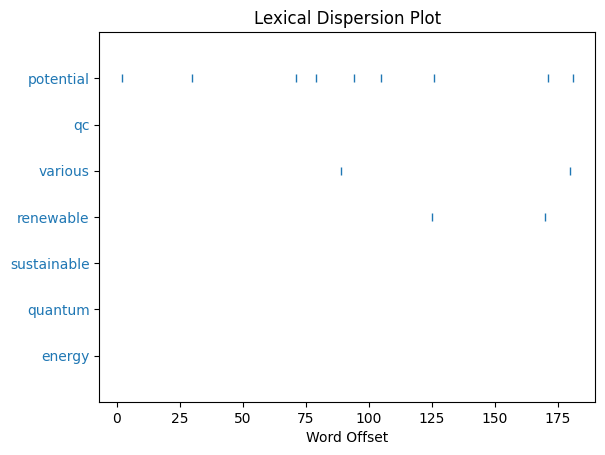

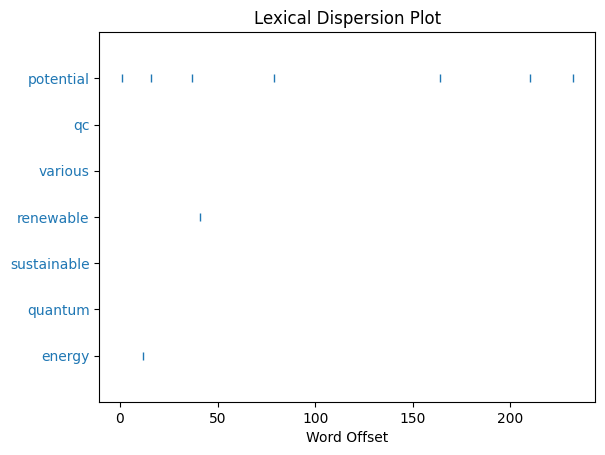

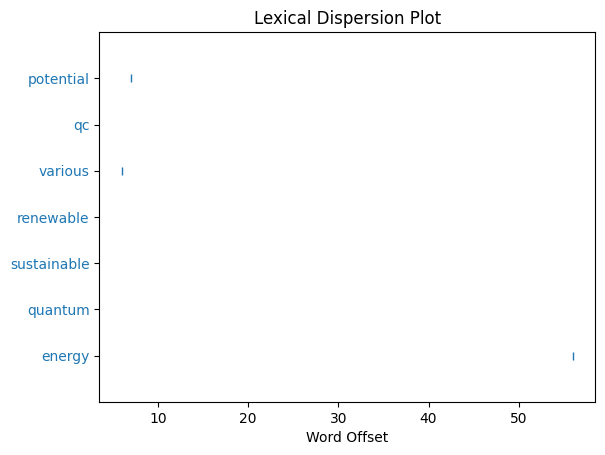

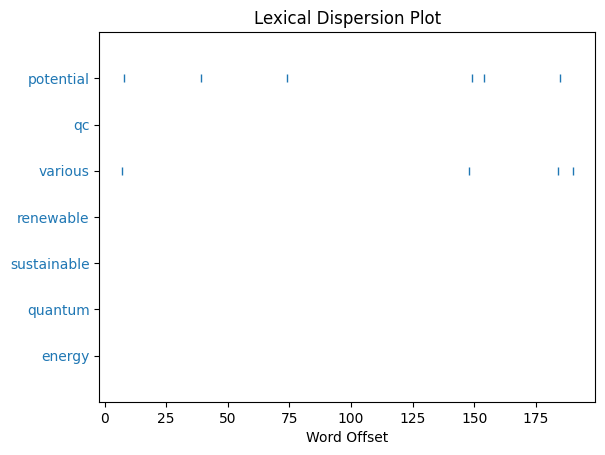

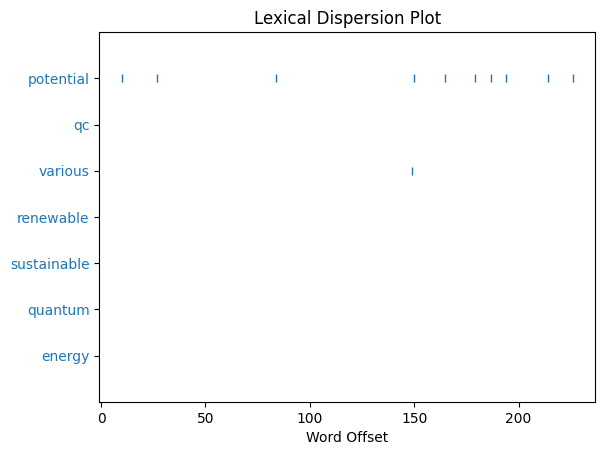

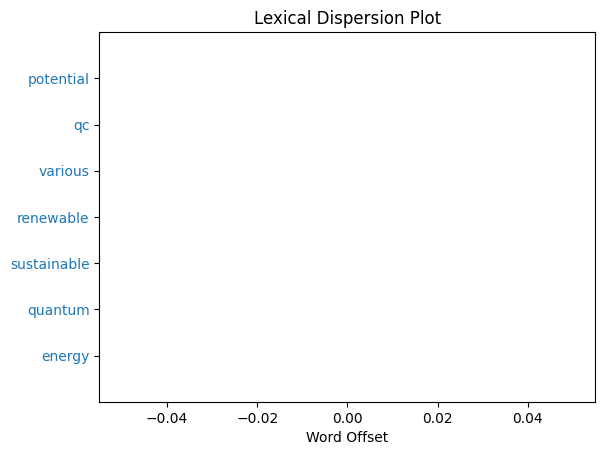

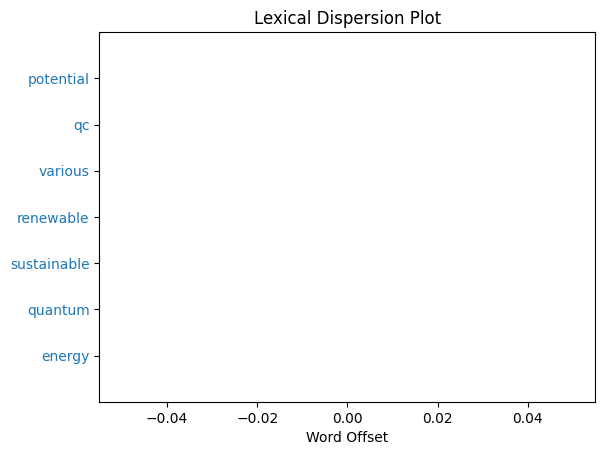

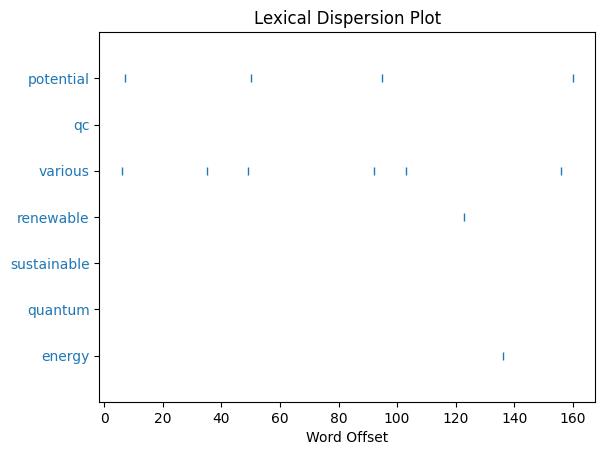

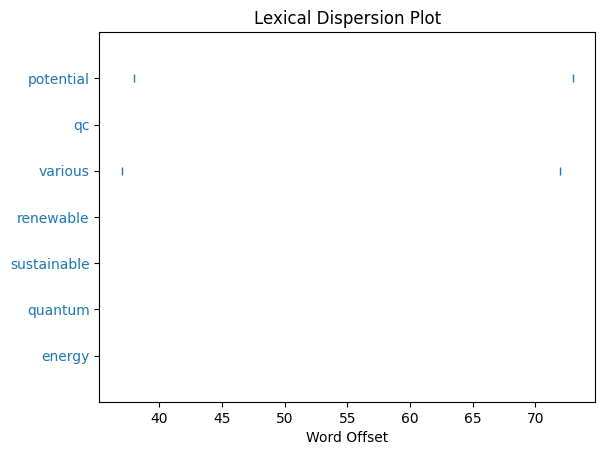

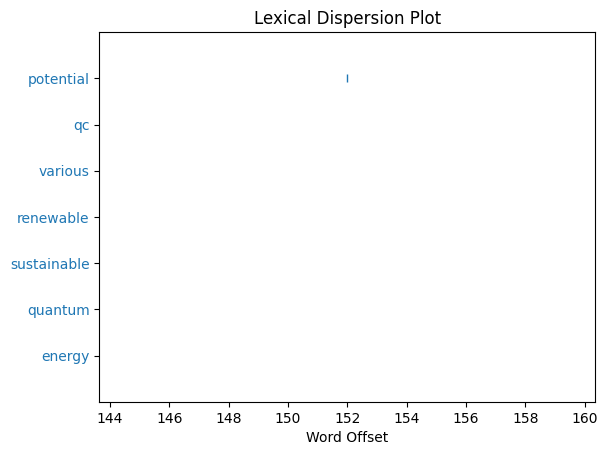

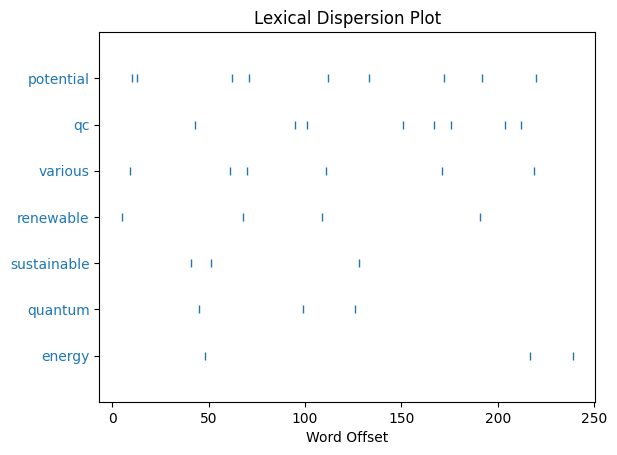

In [ ]:
# Import the Text class from nltk.text module
from nltk.text import Text

# Initialize an empty list to store the text objects
texts = []

# Loop through each row in df['Abstract']
for row in df['Abstract']:
    # Convert the row to a string
    row = str(row)
    # Tokenize the row using nltk.word_tokenize
    tokens = nltk.word_tokenize(row)
    # Create a text object from the tokens using the Text class
    text = Text(tokens)
    # Append the text object to the texts list
    texts.append(text)

# Access the content in the variable frequent_words
print(cleaned_words)

# Loop through each text object in the texts list
for text in texts:
    # Use the dispersion_plot method on the text object, passing the frequent_words as an argument
    text.dispersion_plot(cleaned_words)


# Scikit LEARN

Loading dataset...
done in 32.719s.
Extracting tf-idf features for NMF...
done in 0.036s.
Extracting tf features for LDA...
done in 0.006s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.101s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


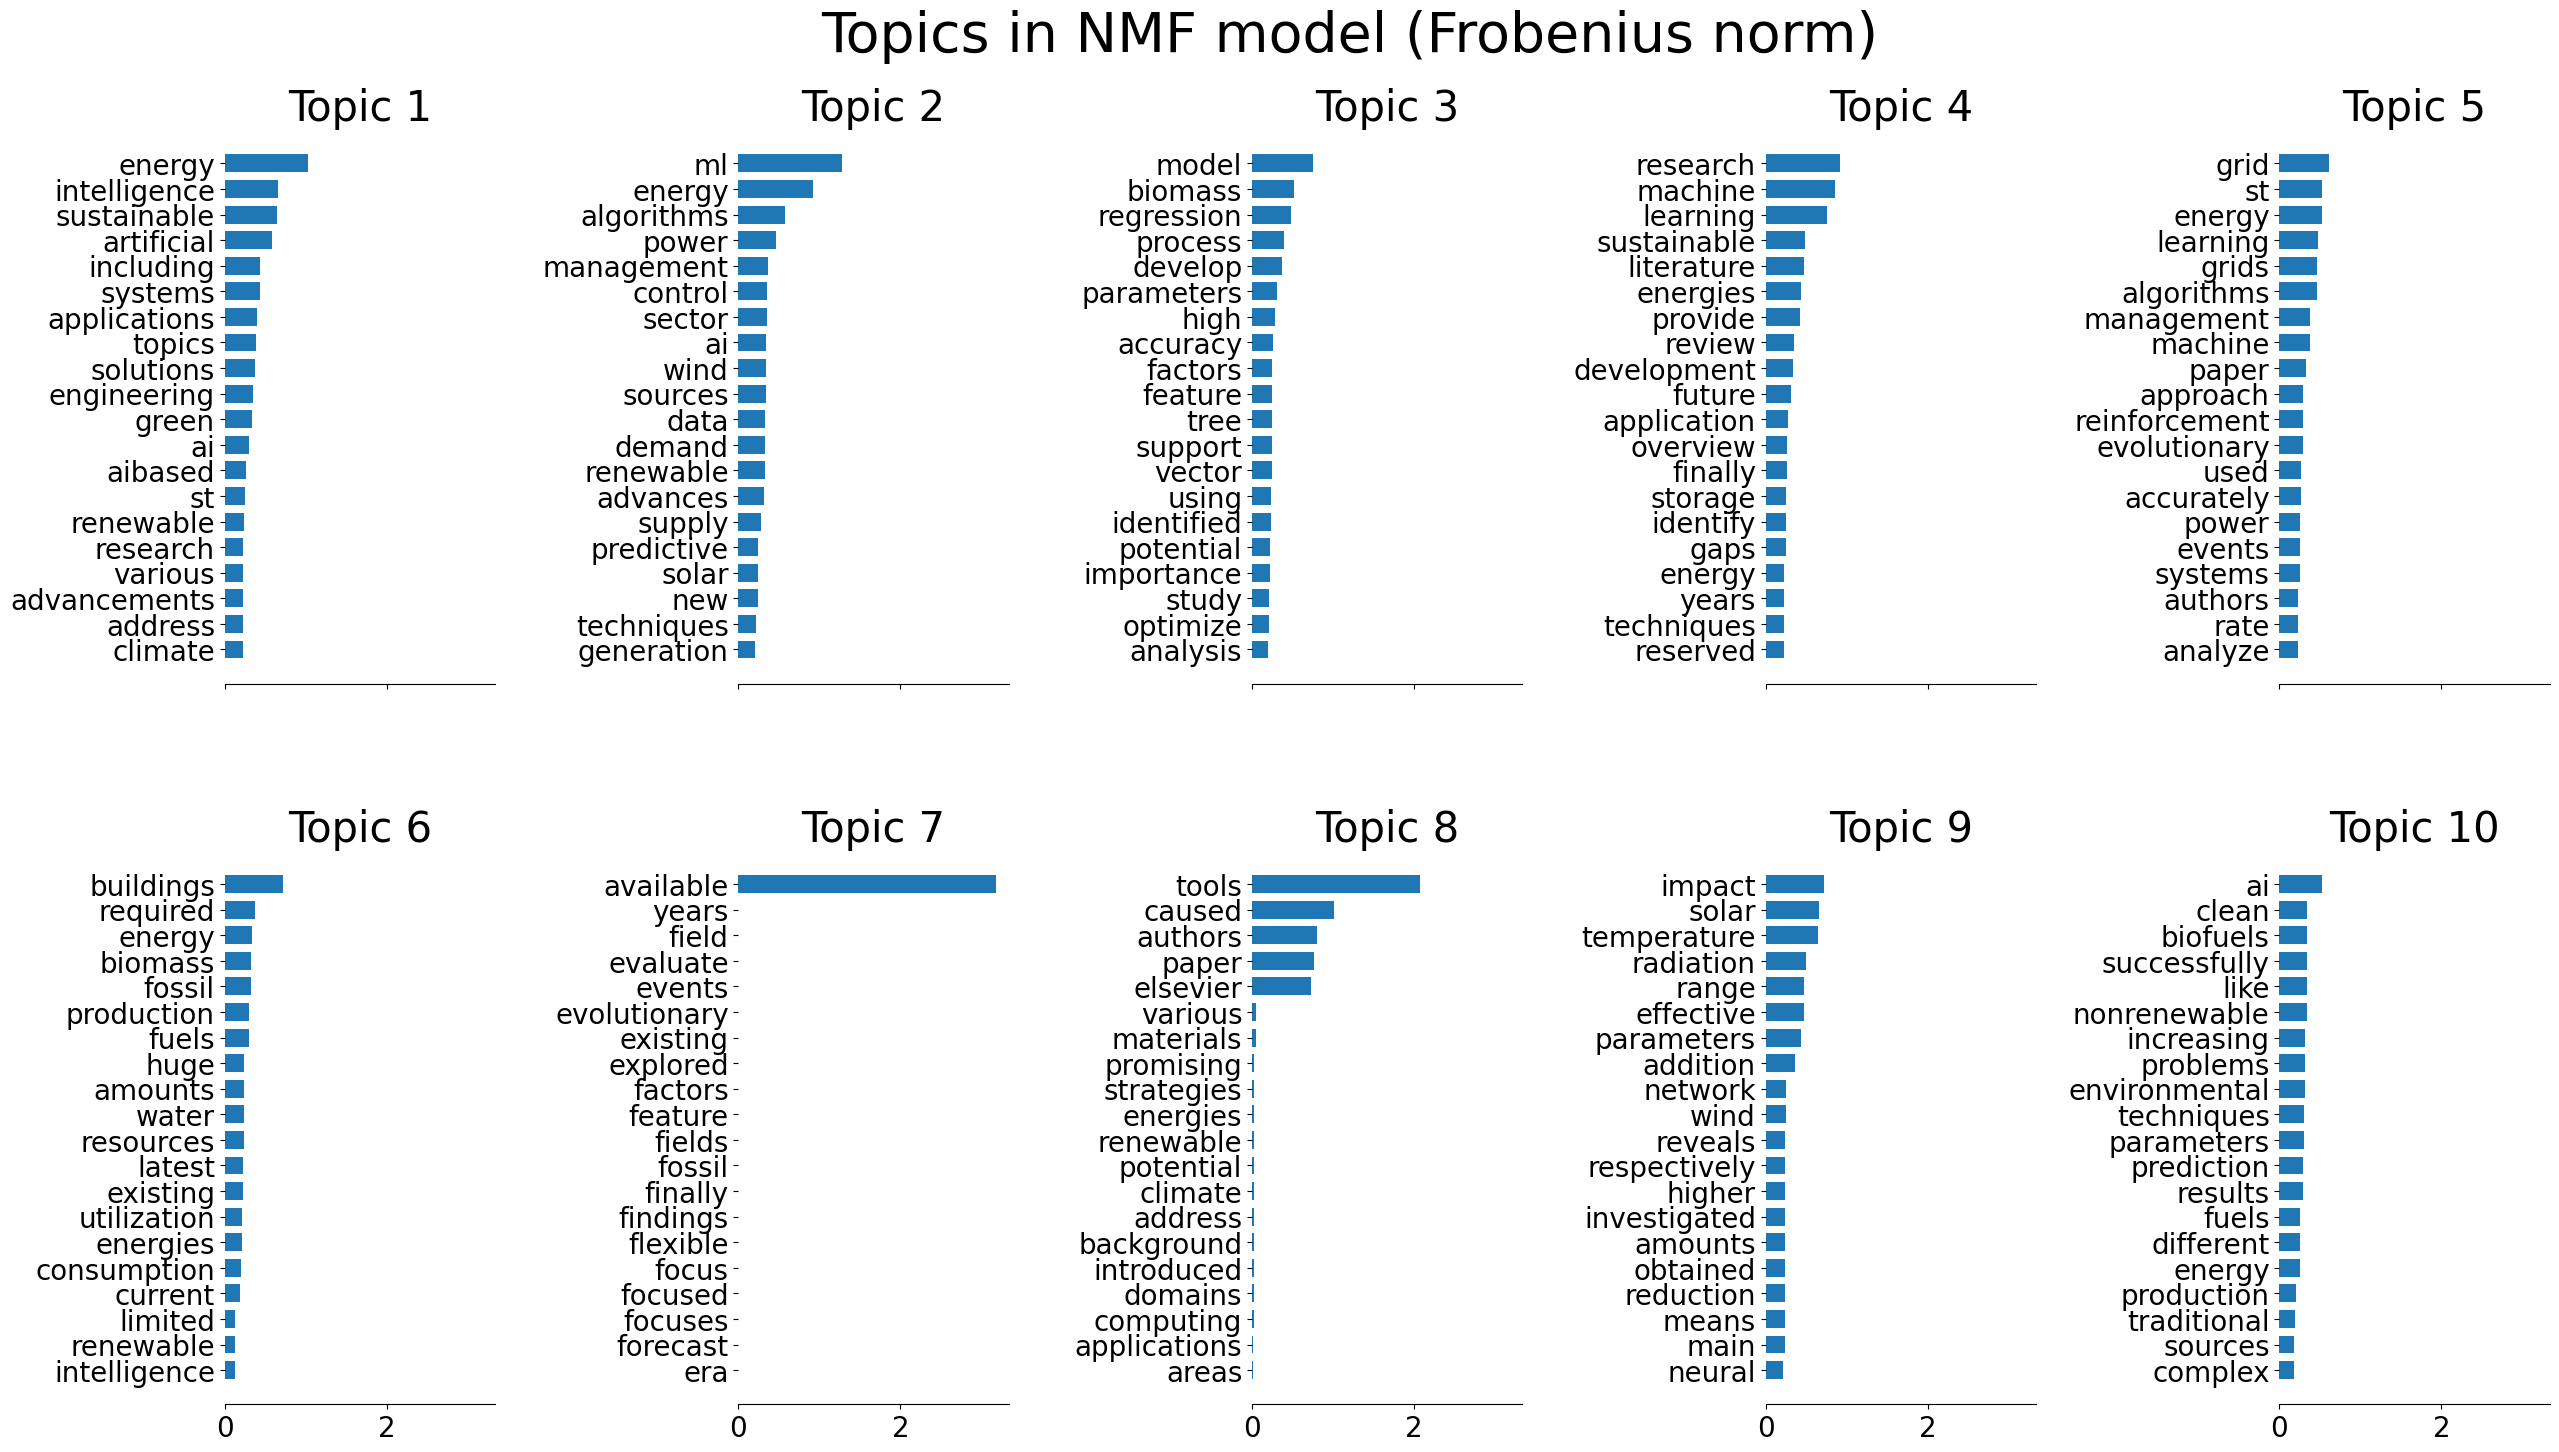



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.157s.


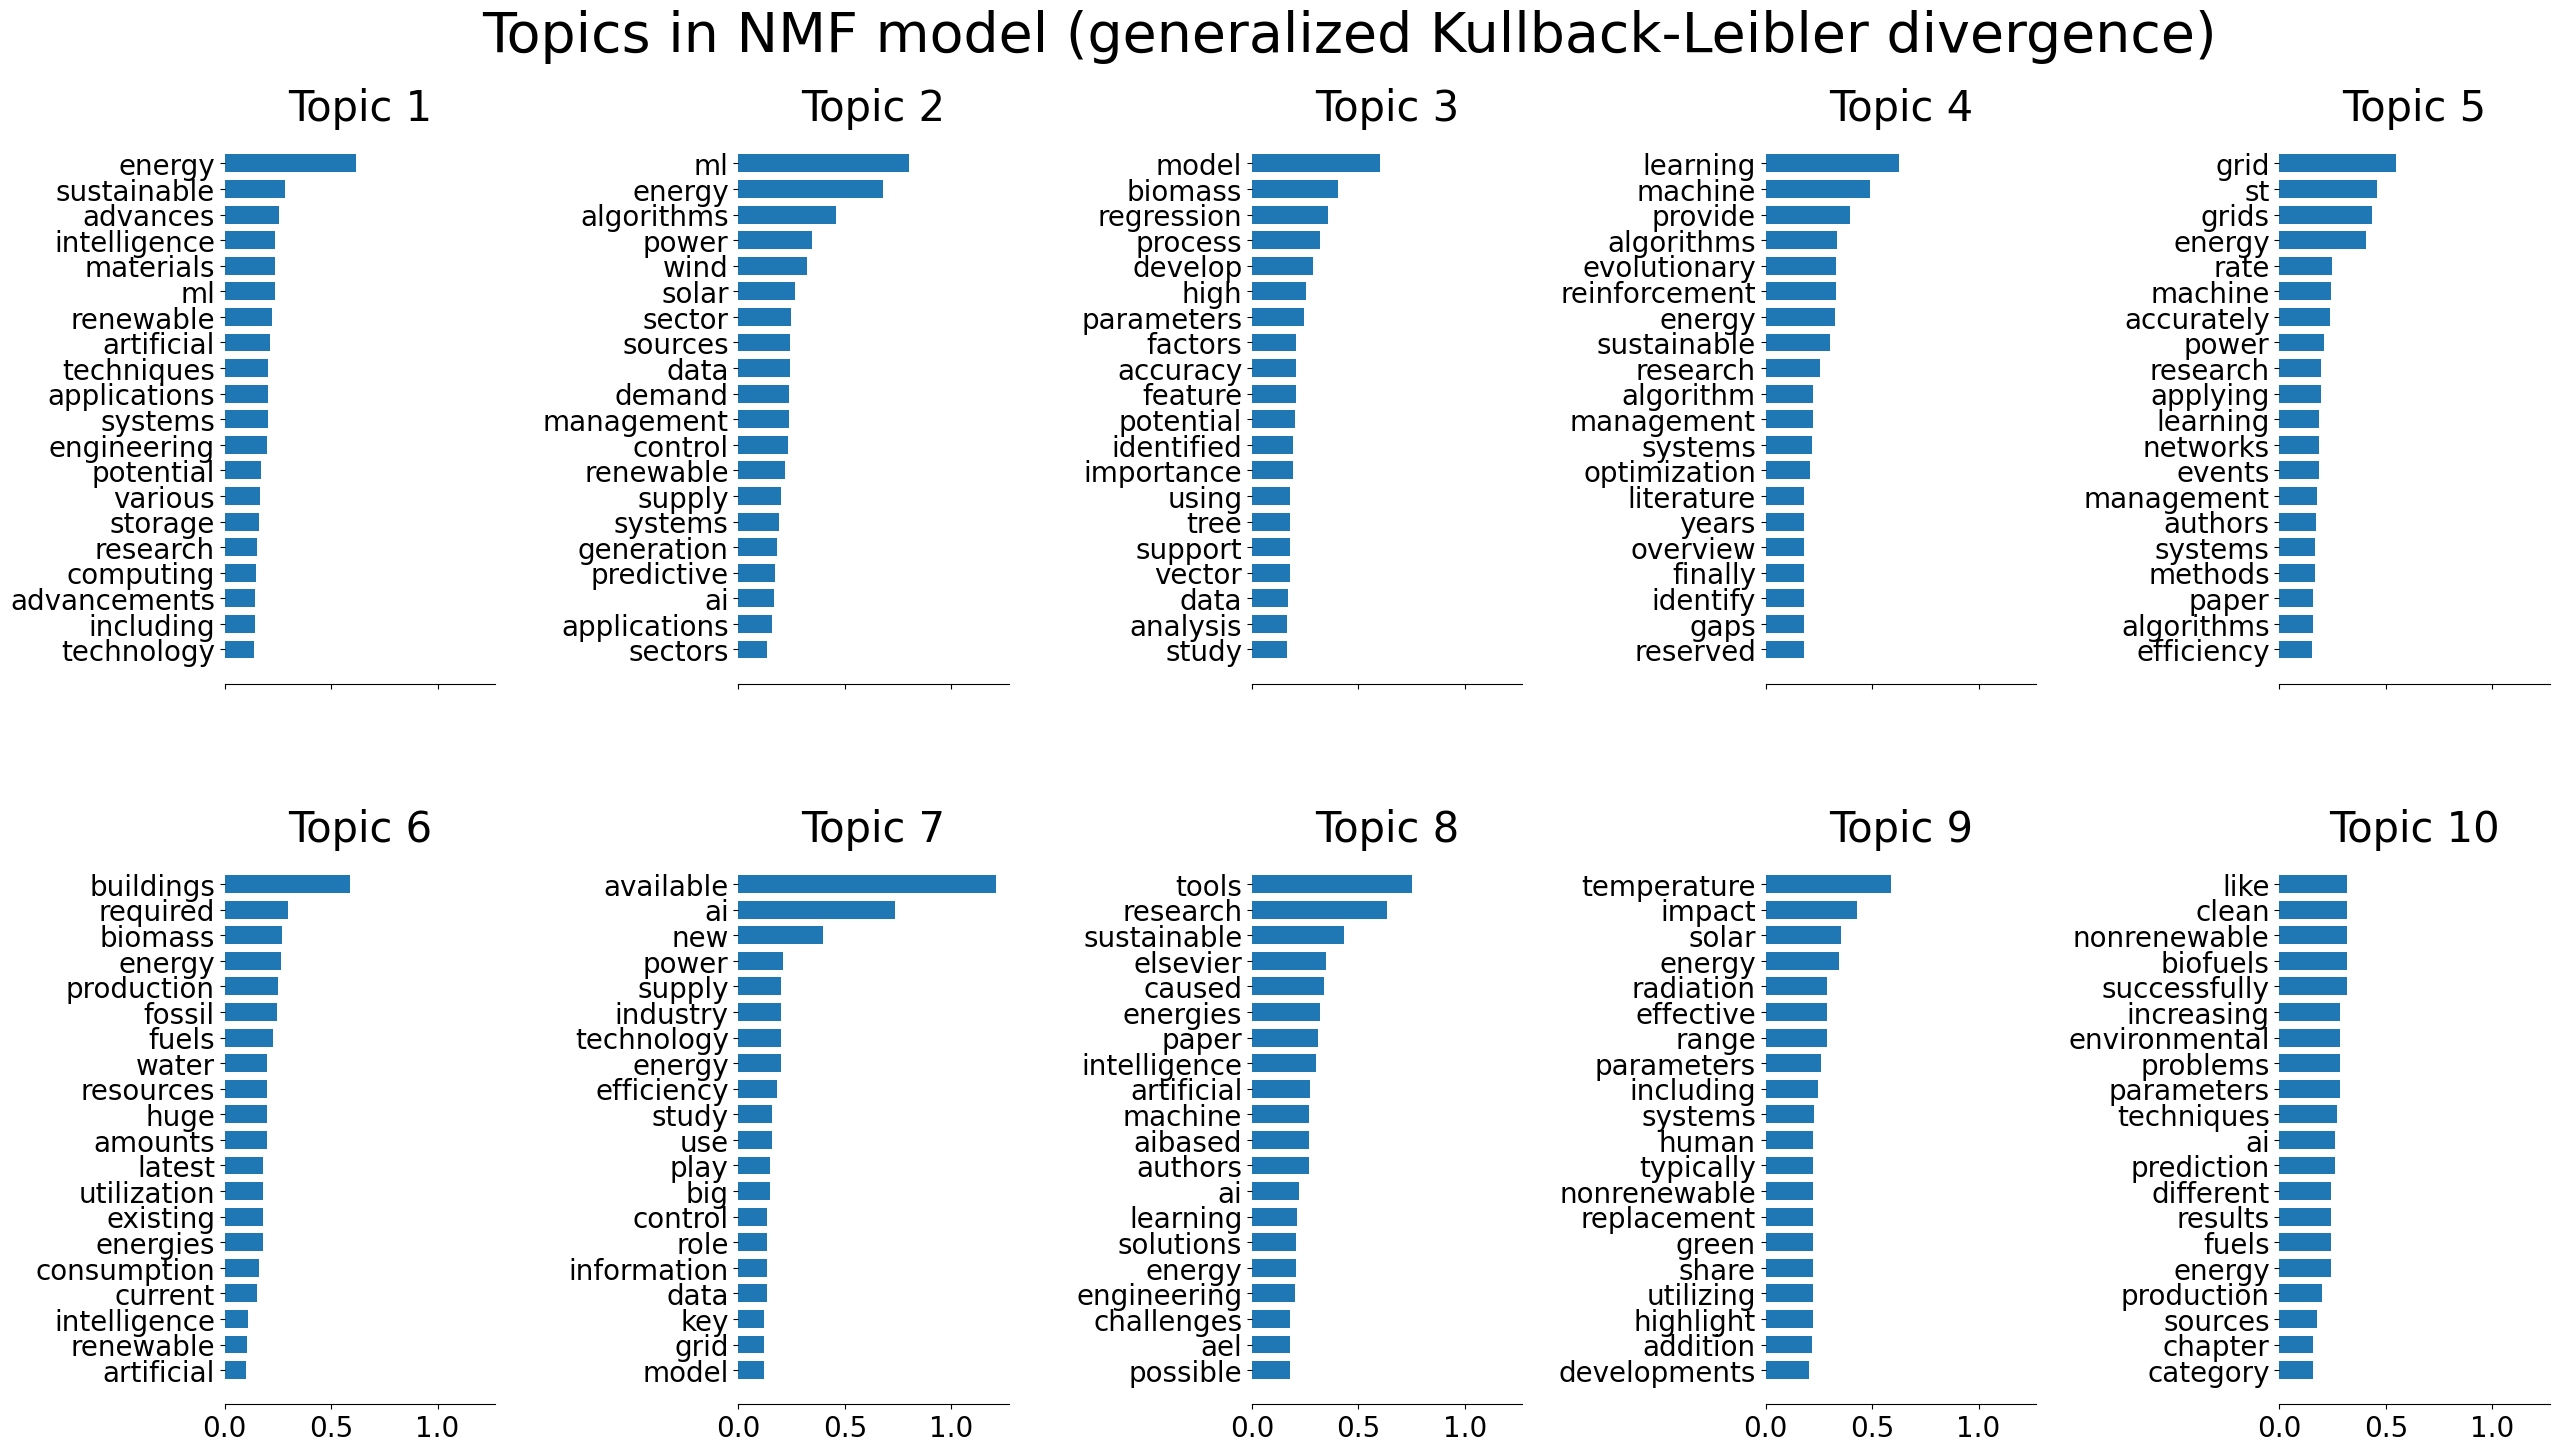



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:2288: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 0.249s.


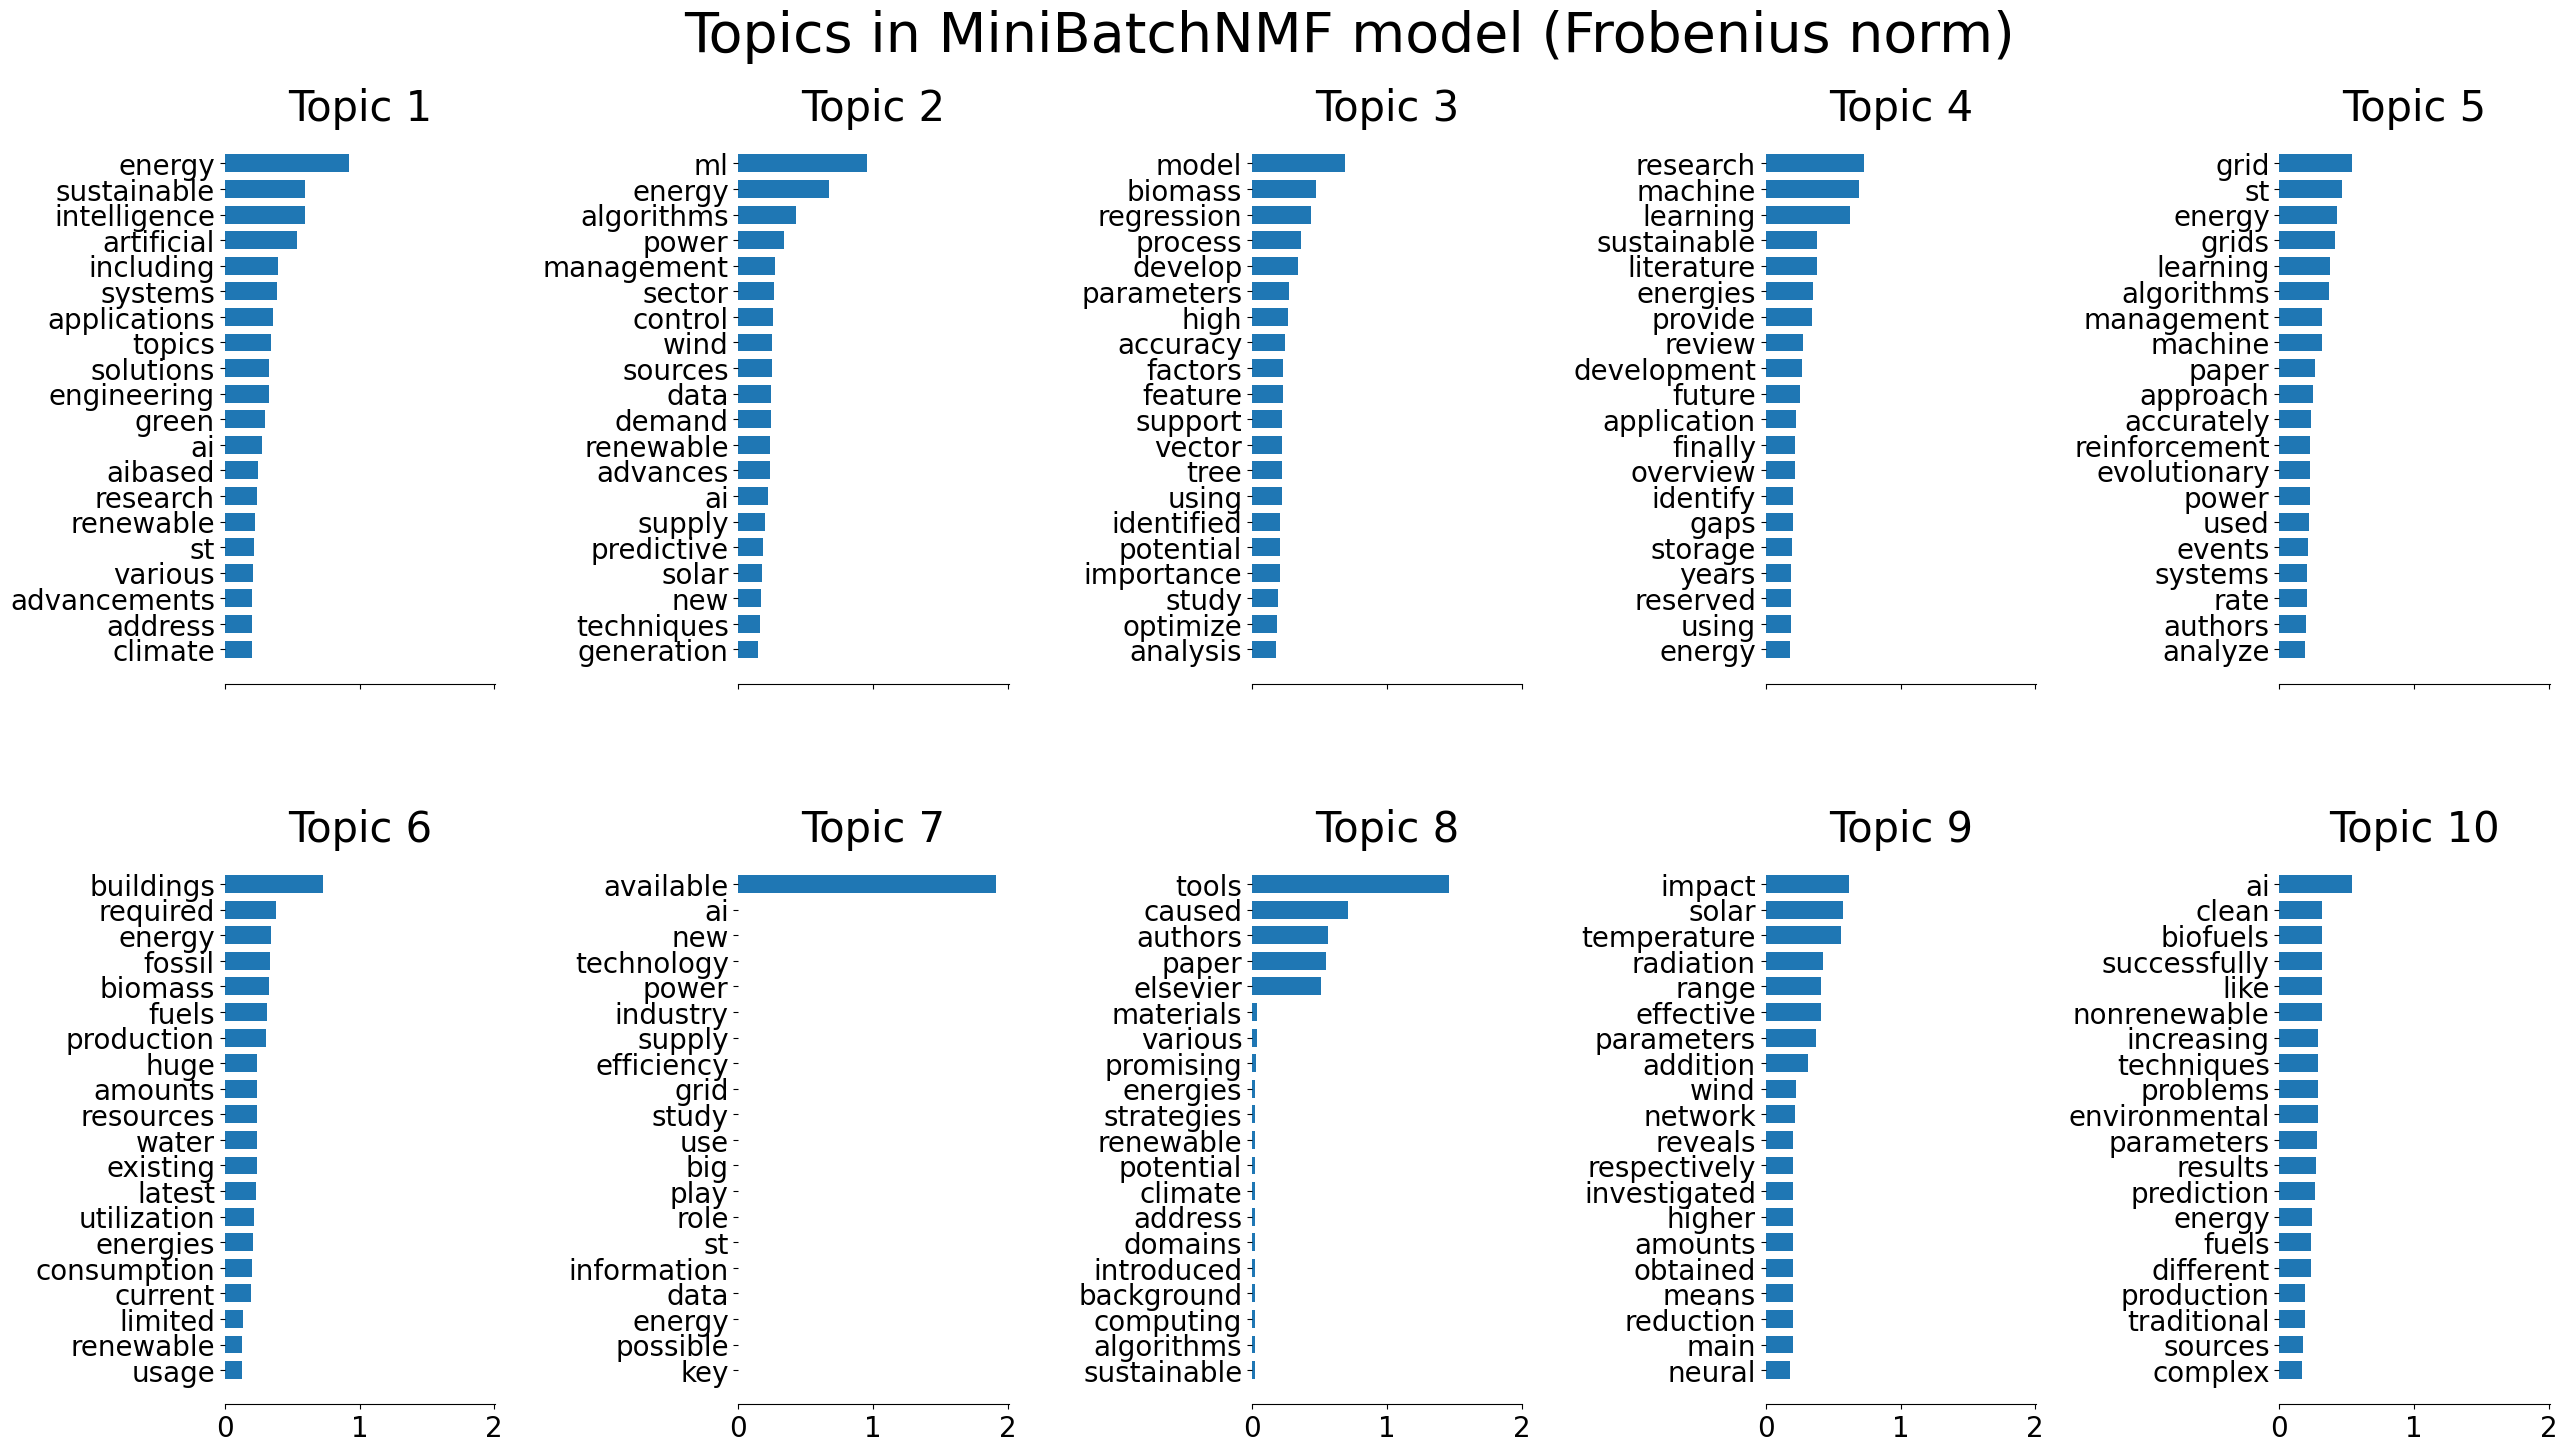



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.645s.


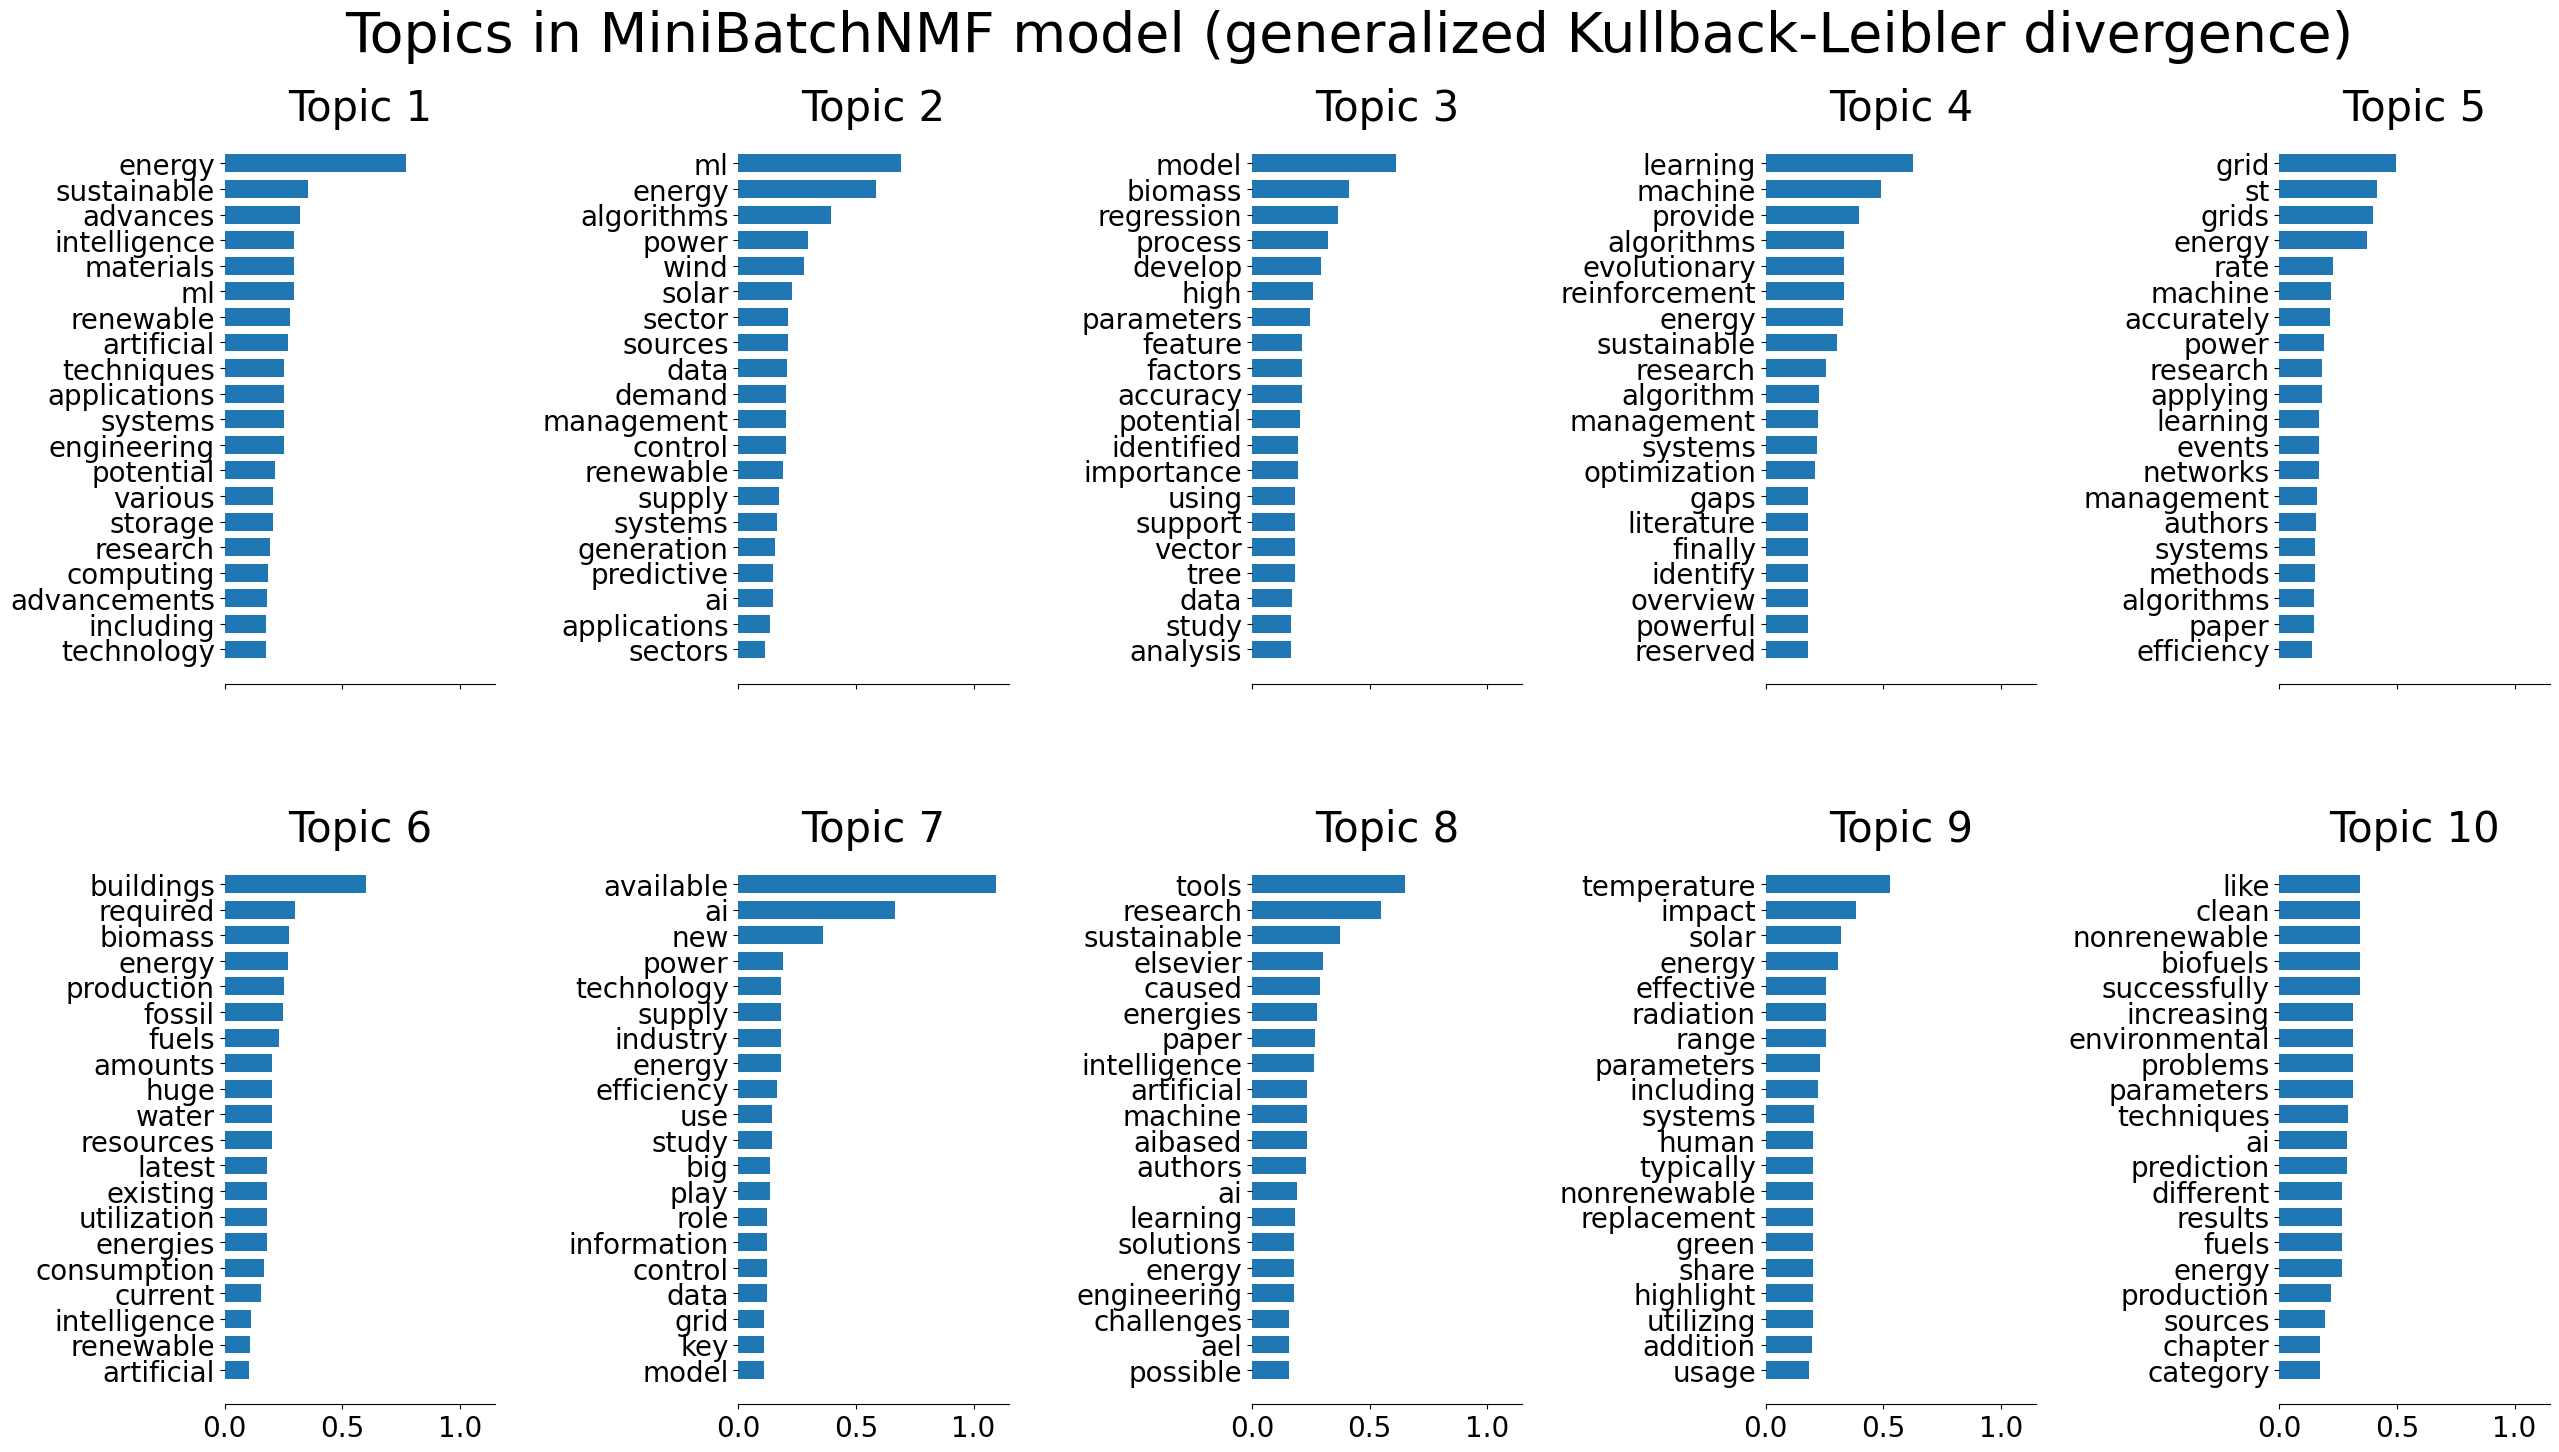



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.111s.


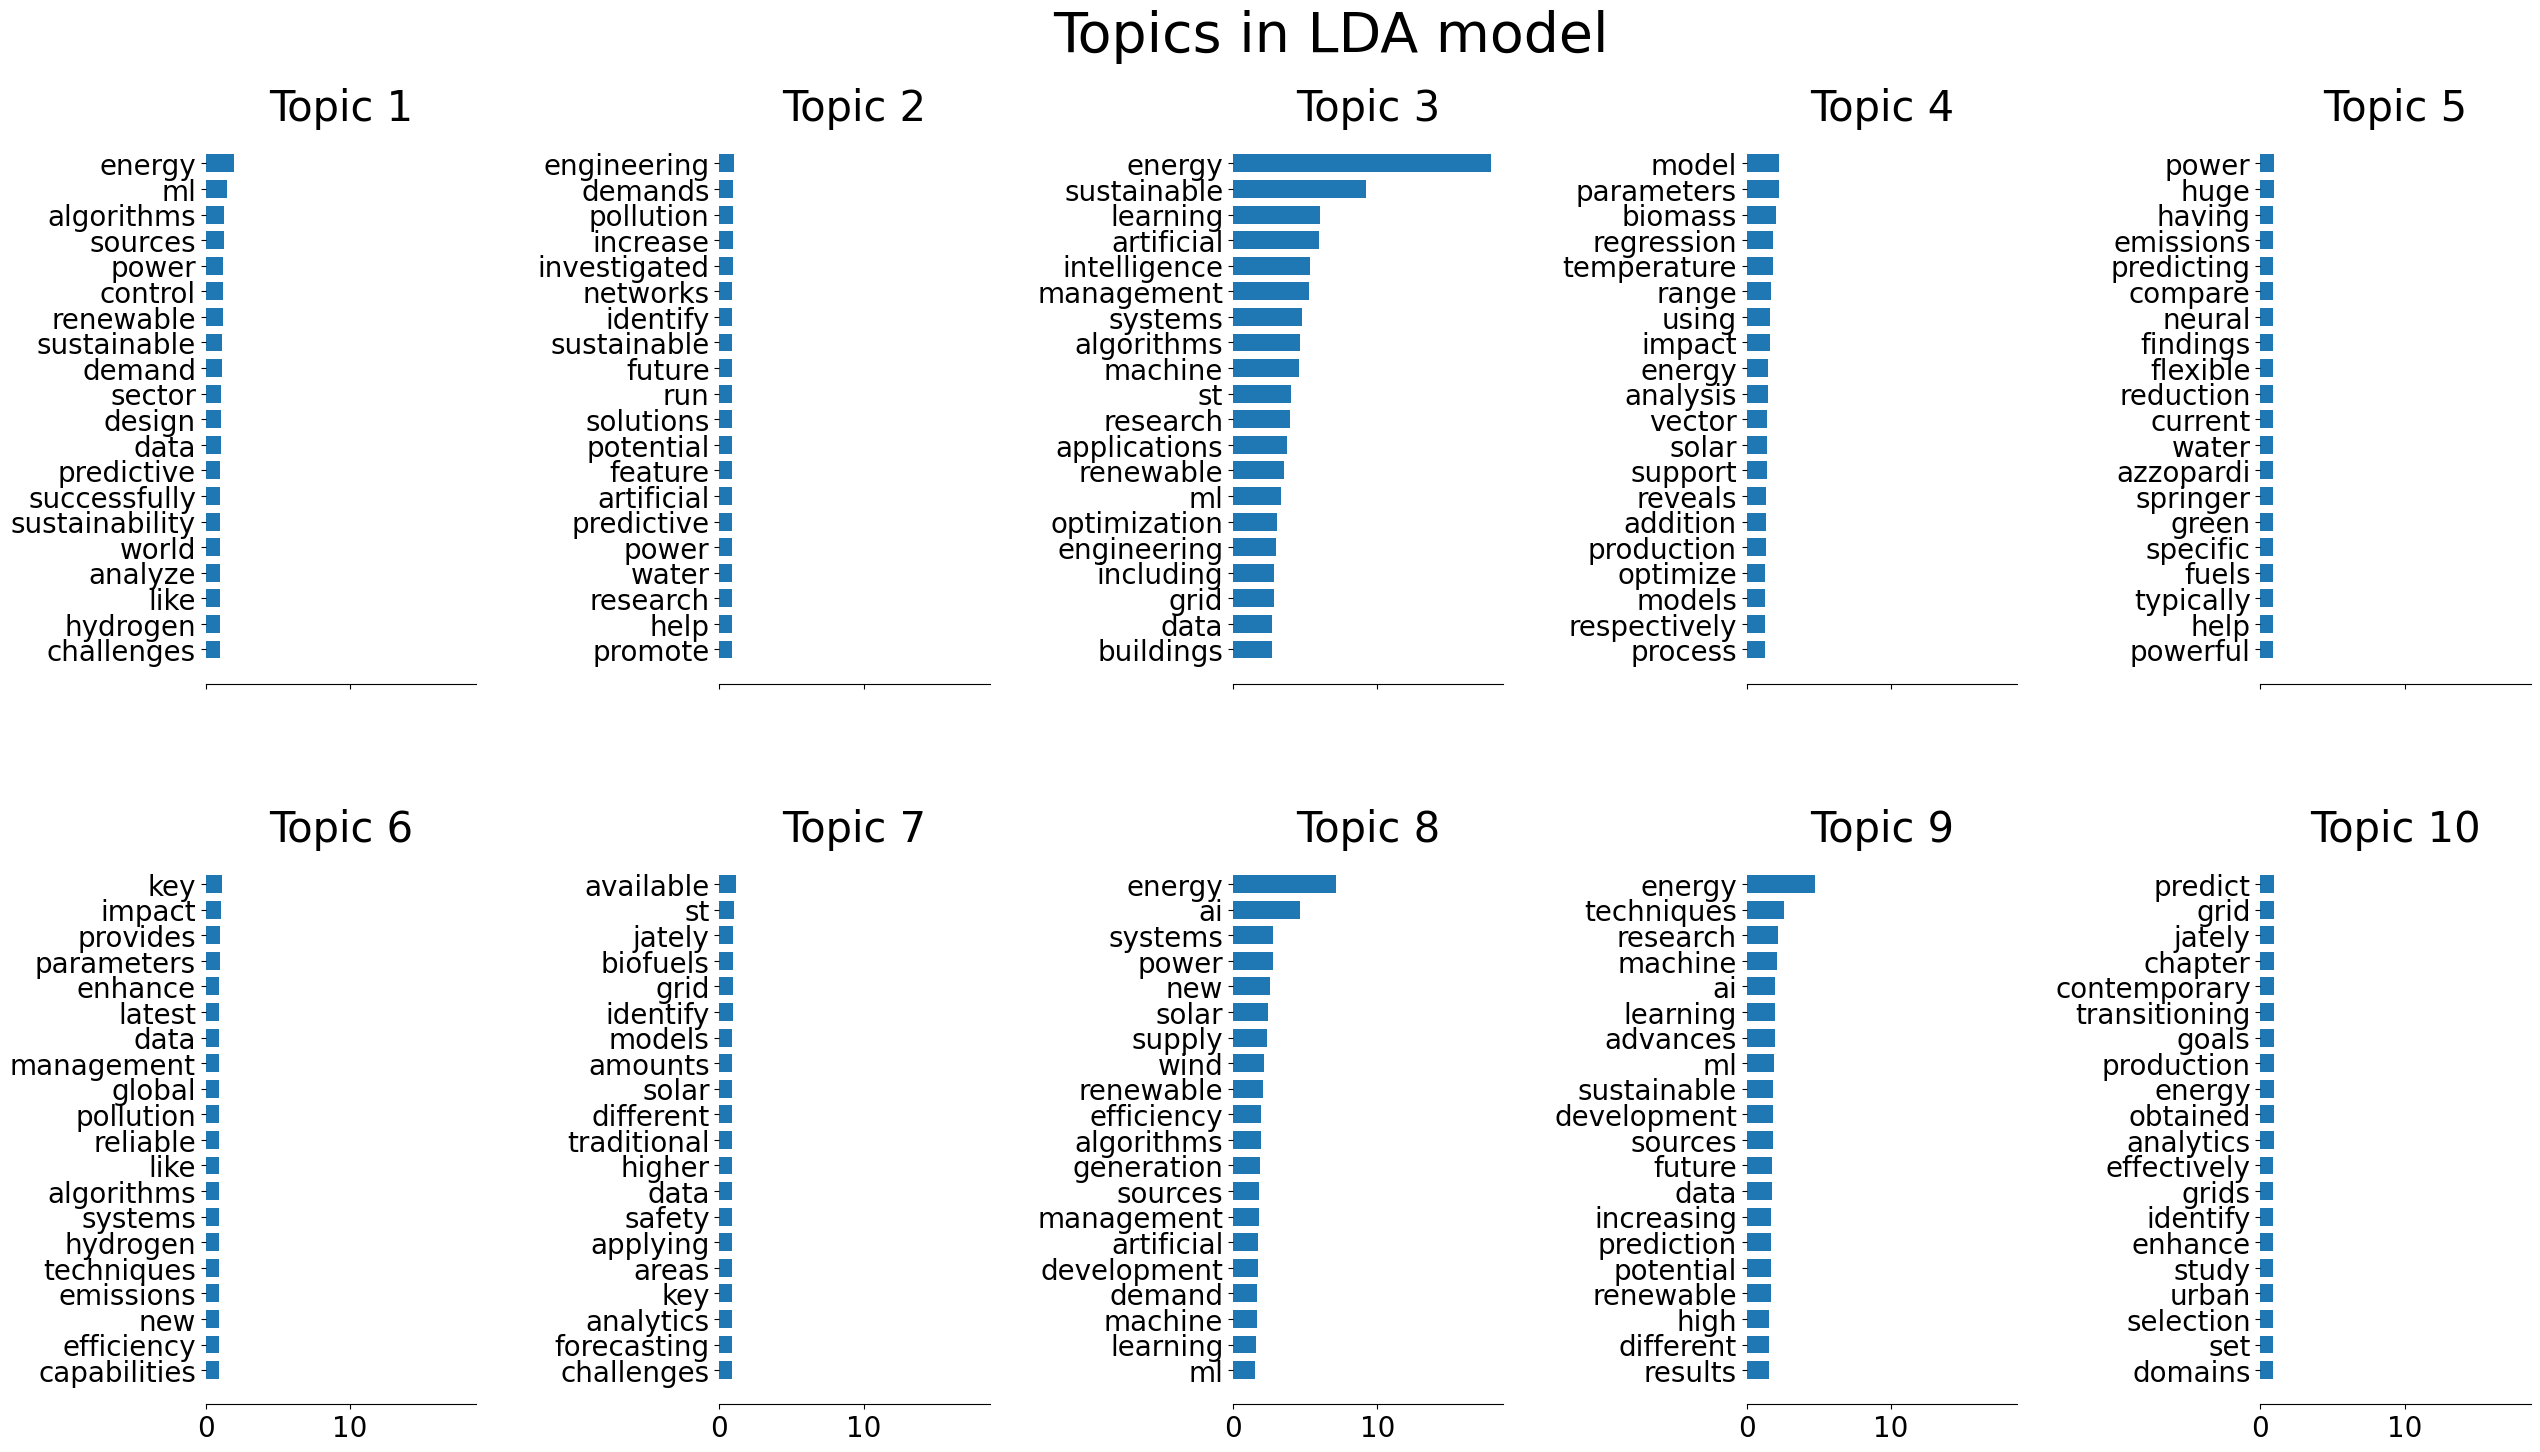

In [ ]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)

# ESTA ES LA LINEA EN LA QUE SE CARGA MI COLUMNA
# ESTA ES LA LINEA EN LA QUE SE CARGA MI COLUMNA
data_samples = df['Abstract'][:n_samples]
# ESTA ES LA LINEA EN LA QUE SE CARGA MI COLUMNA
# ESTA ES LA LINEA EN LA QUE SE CARGA MI COLUMNA


print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [ ]:
import nltk
from collections import Counter

# Assuming that 'nmf' or 'lda' is your trained model and 'tfidf_vectorizer' is your vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top words for each topic
model_top_words = []
for topic_idx, topic in enumerate(nmf.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    model_top_words.extend(top_features)

# Convert to set for faster lookup
model_top_words_set = set(model_top_words)

# Compare with cleaned_words
matched_words = []
for words in cleaned_words:
    # Check if the word is in the top words of the model
    if words in model_top_words_set:
        matched_words.append(words)

# Count the frequency of each matched word
word_counts = Counter(matched_words)

# Print the word counts
for word, count in word_counts.items():
    print(f'{word}: {count}')


fossil: 1
renewable: 4
develop: 1
sustainable: 6
energy: 9
production: 1
storage: 1
provide: 1
sector: 1
potential: 3
algorithm: 2
artificial: 2
intelligence: 2
addition: 1
efficiency: 1
optimization: 1
machine: 1
paper: 1
current: 1


# Nueva sección

In [ ]:
# Loop through each text object in the texts list
for text in texts:
    # Initialize an empty list to store the cleaned words
    cleaned_words = []

    # Loop through each word in the text
    for word in text:
        # Get the part-of-speech tag of the word using pos_tag function
        tag = nltk.pos_tag([word])[0][1]
        # Check if the tag is in the keep_tags set and not in exclude_tags set
        if tag in keep_tags and tag not in exclude_tags:
            # Append the word to the cleaned_words list
            cleaned_words.append(word)

    # Print the cleaned words for each text
    print(cleaned_words)

['clean', 'energy', 'environment', 'influential', 'promote', 'sustainable', 'development', 'increase', 'global', 'population', 'consumption', 'energy', 'nonrenewable', 'category', 'other', 'hand', 'utilization', 'nonrenewable', 'energy', 'environmental', 'air', 'pollution', 'combat', 'energy', 'environmental', 'clean', 'renewable', 'popular', 'petrodiesel', 'replacement', 'be', 'different', 'diesel', 'production', 'engine', 'several', 'influence', 'output', 'accurate', 'prediction', 'end', 'challenge', 'traditional', 'artificial', 'intelligence', 'ai', 'successful', 'nonlinear', 'achieve', 'high', 'success', 'rate', 'prediction', 'chapter', 'different', 'ai', 'feasible', 'solution', 'complex', 'biodiesel', 'production', 'engine', 'detail', 'scrivener', 'publishing', 'llc']
['text', 'sustainable', 'energy', 'st', 'such', 'artificial', 'intelligence', 'blockchain', 'technology', 'internet', 'several', 'case', 'internet', 'artificial', 'intelligence', 'blockchain', 'technology', 'field', 

In [ ]:
import nltk
from gensim import corpora, models

# Tokenize the abstracts
# This will split each abstract into a list of words (tokens)
df['tokens'] = df['Abstract'].apply(lambda x: nltk.word_tokenize(str(x)))

# Create a Gensim dictionary from the tokens
# This will map each unique word to a unique id
dictionary = corpora.Dictionary(df['tokens'])

# Create a Gensim corpus from the dictionary and the tokens
# This will convert each list of tokens into a 'bag of words' representation
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

# Create an LDA model
# This will find topics in the abstracts
# We're setting num_topics to 10, which means the model will find 10 topics
# We're also setting passes to 20 and iterations to 400 to give the model more chances to learn from the data
lda_model = models.LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, passes=20, iterations=400)

# Get the topic for each abstract
# This will assign the most probable topic to each abstract in the DataFrame
df['topic'] = df['tokens'].apply(lambda x: max(lda_model[dictionary.doc2bow(x)], key=lambda item: item[1])[0])

# Print the topics for each document
for i, row in enumerate(corpus):
    row_topics = lda_model.get_document_topics(row)
    print(f"Document {i} topics:")
    for topic, prob in row_topics:
        print(f"Topic: {topic}, Probability: {prob}")

# Create an LDA model
lda_model = models.LdaModel(corpus=corpus, num_topics=10, id2word=dictionary, passes=20, iterations=400)

# Get the top 10 words for each topic
top_words_per_topic = lda_model.show_topics(num_topics=10, num_words=10)

# Print the top 10 words for each topic
for i, topic in top_words_per_topic:
    print(f"Top words for topic {i} are : {topic}")

# Print the top 10 words for each topic
for i, topic in top_words_per_topic:
    # Parse the string to get only the words
    words = ', '.join(word_prob.split('*')[1].strip() for word_prob in topic.split('+'))
    print(f"Top words are : {words}")


Document 0 topics:
Topic: 0, Probability: 0.9948268532752991
Document 1 topics:
Topic: 5, Probability: 0.9960864186286926
Document 2 topics:
Topic: 0, Probability: 0.9923062324523926
Document 3 topics:
Topic: 8, Probability: 0.9830162525177002
Document 4 topics:
Topic: 6, Probability: 0.9951862096786499
Document 5 topics:
Topic: 8, Probability: 0.9963409304618835
Document 6 topics:
Topic: 6, Probability: 0.9971240162849426
Document 7 topics:
Topic: 0, Probability: 0.8002670407295227
Topic: 5, Probability: 0.19622355699539185
Document 8 topics:
Topic: 5, Probability: 0.9939989447593689
Document 9 topics:
Topic: 5, Probability: 0.9956303834915161
Document 10 topics:
Topic: 3, Probability: 0.9217849373817444
Topic: 6, Probability: 0.0740906298160553
Document 11 topics:
Topic: 6, Probability: 0.9972216486930847
Document 12 topics:
Topic: 5, Probability: 0.9941548109054565
Document 13 topics:
Topic: 5, Probability: 0.9956516027450562
Document 14 topics:
Topic: 1, Probability: 0.996153235435

In [ ]:
# Import the necessary libraries
import nltk
from gensim import corpora, models

# Tokenize each document in cleaned_words. cleaned_words is assumed to be a list of strings where each string is a document.
tokenized_docs = [nltk.word_tokenize(doc) for doc in cleaned_words]

# Create a Gensim dictionary from the tokens. This will map each unique word to a unique id.
dictionary = corpora.Dictionary(tokenized_docs)

# Create a Gensim corpus from the dictionary and the tokens. This will convert each list of tokens into a 'bag of words' representation.
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_docs]

# Create an LDA model. This will find topics in the documents.
# num_topics=20 specifies that you want the model to find 20 topics.
# passes=20 and iterations=400 give the model more chances to learn from the data.
lda_model = models.LdaModel(corpus=corpus, num_topics=20, id2word=dictionary, passes=20, iterations=400)

# Get the topic for each abstract
# This will assign the most probable topic to each abstract in the DataFrame
df['topic'] = [max(lda_model[dictionary.doc2bow(x)], key=lambda item: item[1])[0] for x in df['tokens']]

# Print the top 10 words for each topic
for i, topic in top_words_per_topic:
    # Parse the string to get only the words
    words = ', '.join(word_prob.split('*')[1].strip() for word_prob in topic.split('+'))
    print(i,f"Top words  fot each topic are : {words}")

# Get the top 10 words for each topic
top_words_per_topic = lda_model.show_topics(num_topics=20, num_words=10)

# Print the top 10 words for each topic
#for i, topic in top_words_per_topic:
    #print(f"Top words for topic {i} are : {topic}")

0 Top words  fot each topic are : "intelligence", "conventional", "review", "algorithms", "energy", "background", "brief", "addition", "change", "constituent"
1 Top words  fot each topic are : "critical", "complexity", "discuss", "performance", "neutrality", "artificial", "quantum", "change", "addition", "help"
2 Top words  fot each topic are : "classical", "quantum", "change", "help", "constituent", "background", "brief", "addition", "promising", "address"
3 Top words  fot each topic are : "sustainability", "change", "help", "background", "brief", "addition", "address", "improve", "handle", "promising"
4 Top words  fot each topic are : "algorithms", "revolutionize", "thatdraw", "renewable", "address", "brief", "addition", "change", "background", "help"
5 Top words  fot each topic are : "energy", "storage", "macroenergy", "various", "change", "help", "background", "brief", "addition", "improve"
6 Top words  fot each topic are : "qc", "be", "improve", "change", "promising", "constituent

The ‘Document’ column is the document number, the ‘Topic’ column is the topic number, and the ‘Probability’ column is the probability of the topic in the document.

In [ ]:
import pandas as pd

# Initialize an empty list to store the rows of the table
table_rows = []

# Loop through each document in the corpus
for i, row in enumerate(corpus):
    # Get the topics for the document
    row_topics = lda_model.get_document_topics(row)

    # Loop through each topic and its probability
    for topic, prob in row_topics:
        # Append the document number, topic, and probability to the table_rows list
        table_rows.append([i, topic, prob])

# Create a DataFrame from the table_rows list
df_topics = pd.DataFrame(table_rows, columns=['Document', 'Topic', 'Probability'])

# Print the DataFrame
#print(df_topics)


# Also can be printed like this

# Print the topics for each document
#for i, row in enumerate(corpus):
   # row_topics = lda_model.get_document_topics(row)
   # print(f"Document {i} topics:")
   # for topic, prob in row_topics:
   #     print(f"Topic: {topic}, Probability: {prob}")
